In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import xgboost as xgb

import plotly.graph_objs as go

RANDOM_STATE=42

# Predecimos esta jornada
jornada=31
path_files='..\..\la_liga_data\primera\Bet365'
path_last='..\..\la_liga_data\primera'

In [2]:
lista_ficheros=[path_files+'\SP1-2005-2006.csv',
path_files+'\SP1-2006-2007.csv',
path_files+'\SP1-2007-2008.csv',
path_files+'\SP1-2008-2009.csv',
path_files+'\SP1-2009-2010.csv',
path_files+'\SP1-2010-2011.csv',
path_files+'\SP1-2011-2012.csv',
path_files+'\SP1-2012-2013.csv',
path_files+'\SP1-2013-2014.csv',
path_files+'\SP1-2014-2015.csv',
path_files+'\SP1-2015-2016.csv',
path_files+'\SP1-2016-2017.csv',
path_files+'\SP1-2017-2018.csv',
path_files+'\SP1-2018-2019.csv',
path_files+'\SP1-2019-2020.csv',               
path_last+'\SP1-J'+str(jornada)+'\SP1-2020-2021.csv',
path_last+'\SP1-J'+str(jornada)+'\SP1-J'+str(jornada)+'-2020-2021.csv']

In [3]:
columns=['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA']

# Montamos el dataset

In [9]:
j=1
for x in lista_ficheros:
    print(x)       
    _liga=pd.read_csv(x)
    # Nos quedamos solo con estas columnas para empezar
    _liga=_liga[columns]
    # Existen dos formatos posibles de la fecha con 19 o 2019
    # Pero solo cambia en las dos ultimas temporadas
    formato='%d/%m/%Y' if ((x == path_files+'\SP1-2018-2019.csv')
                           or (x == path_files+'\SP1-2019-2020.csv') 
                           or (x == path_last+'\SP1-J'+str(jornada)+'\SP1-2020-2021.csv')
                           or (x == path_last+'\SP1-J'+str(jornada)+'\SP1-J'+str(jornada)+'-2020-2021.csv')) else '%d/%m/%y'
    _liga['Date1']=pd.to_datetime(_liga['Date'], format=formato)
    # Añadimos la temporada
    _liga['Temporada']=x[-13:-4]
    # Ordenamos por la fecha del partido
    _liga.sort_values(by=['Date1'], ascending=False, inplace=True)
    # Vamos juntando todas las temporadas.
    liga = _liga.copy(deep=True) if j==1 else pd.concat([_liga,liga], axis=0)
    j+=1
# Reseteamos el indice
liga.reset_index(drop=True,inplace=True)

..\..\la_liga_data\primera\Bet365\SP1-2005-2006.csv
..\..\la_liga_data\primera\Bet365\SP1-2006-2007.csv
..\..\la_liga_data\primera\Bet365\SP1-2007-2008.csv
..\..\la_liga_data\primera\Bet365\SP1-2008-2009.csv
..\..\la_liga_data\primera\Bet365\SP1-2009-2010.csv
..\..\la_liga_data\primera\Bet365\SP1-2010-2011.csv
..\..\la_liga_data\primera\Bet365\SP1-2011-2012.csv
..\..\la_liga_data\primera\Bet365\SP1-2012-2013.csv
..\..\la_liga_data\primera\Bet365\SP1-2013-2014.csv
..\..\la_liga_data\primera\Bet365\SP1-2014-2015.csv
..\..\la_liga_data\primera\Bet365\SP1-2015-2016.csv
..\..\la_liga_data\primera\Bet365\SP1-2016-2017.csv
..\..\la_liga_data\primera\Bet365\SP1-2017-2018.csv
..\..\la_liga_data\primera\Bet365\SP1-2018-2019.csv
..\..\la_liga_data\primera\Bet365\SP1-2019-2020.csv
..\..\la_liga_data\primera\SP1-J31\SP1-2020-2021.csv
..\..\la_liga_data\primera\SP1-J31\SP1-J31-2020-2021.csv


In [10]:
liga[10:].head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,Date1,Temporada
10,SP1,12/04/2021,Celta,Sevilla,3.0,4.0,A,3.0,2.0,H,...,3.25,2.20,3.40,3.30,2.20,3.40,3.25,2.20,2021-04-12,2020-2021
11,SP1,11/04/2021,Betis,Ath Madrid,1.0,1.0,D,1.0,1.0,D,...,3.05,2.40,3.20,3.20,2.35,3.13,3.10,2.38,2021-04-11,2020-2021
12,SP1,11/04/2021,Valladolid,Granada,1.0,2.0,A,1.0,0.0,H,...,3.30,3.55,2.15,3.25,3.60,2.10,3.25,3.60,2021-04-11,2020-2021
13,SP1,11/04/2021,Valencia,Sociedad,2.0,2.0,D,0.0,2.0,A,...,3.25,2.20,3.60,3.40,2.10,3.50,3.40,2.10,2021-04-11,2020-2021
14,SP1,11/04/2021,Villarreal,Osasuna,1.0,2.0,A,0.0,0.0,D,...,3.65,5.50,1.67,3.60,5.80,1.65,3.70,5.50,2021-04-11,2020-2021
15,SP1,10/04/2021,Eibar,Levante,0.0,1.0,A,0.0,1.0,A,...,3.35,3.30,2.20,3.40,3.30,2.20,3.40,3.20,2021-04-10,2020-2021
16,SP1,10/04/2021,Ath Bilbao,Alaves,0.0,0.0,D,0.0,0.0,D,...,3.25,4.50,1.88,3.30,4.60,1.90,3.30,4.33,2021-04-10,2020-2021
17,SP1,10/04/2021,Getafe,Cadiz,0.0,1.0,A,0.0,0.0,D,...,3.05,4.80,2.00,3.10,4.50,1.95,3.10,4.75,2021-04-10,2020-2021
18,SP1,10/04/2021,Real Madrid,Barcelona,2.0,1.0,H,2.0,0.0,H,...,3.70,2.30,2.90,3.70,2.30,2.80,3.75,2.30,2021-04-10,2020-2021
19,SP1,09/04/2021,Huesca,Elche,3.0,1.0,H,2.0,1.0,H,...,3.10,4.10,2.05,3.20,4.00,2.05,3.30,3.90,2021-04-09,2020-2021


In [11]:
liga.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,Date1,Temporada
0,SP1,22/04/2021,Ath Madrid,Huesca,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-22,2020-2021
1,SP1,22/04/2021,Granada,Eibar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-22,2020-2021
2,SP1,22/04/2021,Sociedad,Celta,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-22,2020-2021
3,SP1,22/04/2021,Barcelona,Getafe,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-22,2020-2021
4,SP1,21/04/2021,Levante,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021
5,SP1,21/04/2021,Osasuna,Valencia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021
6,SP1,21/04/2021,Betis,Ath Bilbao,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021
7,SP1,21/04/2021,Alaves,Villarreal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021
8,SP1,21/04/2021,Elche,Valladolid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021
9,SP1,21/04/2021,Cadiz,Real Madrid,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-2021


In [12]:
liga.shape

(6010, 39)

In [13]:
liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Div        6010 non-null   object        
 1   Date       6010 non-null   object        
 2   HomeTeam   6010 non-null   object        
 3   AwayTeam   6010 non-null   object        
 4   FTHG       6000 non-null   float64       
 5   FTAG       6000 non-null   float64       
 6   FTR        6000 non-null   object        
 7   HTHG       6000 non-null   float64       
 8   HTAG       6000 non-null   float64       
 9   HTR        6000 non-null   object        
 10  HS         6000 non-null   float64       
 11  AS         6000 non-null   float64       
 12  HST        6000 non-null   float64       
 13  AST        6000 non-null   float64       
 14  HF         6000 non-null   float64       
 15  AF         6000 non-null   float64       
 16  HC         6000 non-null   float64       


In [14]:
# Quitamos los nuelos excepto en los 10 ultimos partidos de la ultima jornada
liga[10:].isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
B365H         0
B365D         0
B365A         0
BWH           0
BWD           0
BWA           0
IWH           7
IWD           7
IWA           7
WHH          99
WHD          99
WHA          99
VCH           5
VCD           5
VCA           5
Date1         0
Temporada     0
dtype: int64

In [15]:
liga[10:].fillna(-998,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
liga.isnull().sum()

Div           0
Date          0
HomeTeam      0
AwayTeam      0
FTHG         10
FTAG         10
FTR          10
HTHG         10
HTAG         10
HTR          10
HS           10
AS           10
HST          10
AST          10
HF           10
AF           10
HC           10
AC           10
HY           10
AY           10
HR           10
AR           10
B365H        10
B365D        10
B365A        10
BWH          10
BWD          10
BWA          10
IWH          10
IWD          10
IWA          10
WHH          10
WHD          10
WHA          10
VCH          10
VCD          10
VCA          10
Date1         0
Temporada     0
dtype: int64

## Encoding de los equipos

In [17]:
equipos_home=pd.read_csv(path_last+'/SP1-encoders/SP1_equipos_encoding.csv')
equipos_home.set_index('index',inplace=True)

In [18]:
equipos_home

,Id
index,
Ath Madrid,0
Sevilla,1
Barcelona,2
Real Madrid,3
Valencia,4
Ath Bilbao,5
Espanol,6
Getafe,7
Villarreal,8


In [19]:
liga['HomeTeamCode']=liga['HomeTeam'].map(equipos_home['Id'])
liga['AwayTeamCode']=liga['AwayTeam'].map(equipos_home['Id'])

In [20]:
liga['HomeTeamCode'].isnull().sum()

0

In [21]:
#liga[liga.isnull().any(axis=1)]

In [22]:
liga['AwayTeamCode'].isnull().sum()

0

## Encoding de los resultados

In [23]:
liga.loc[ liga['FTR']=='H', 'ResultadoFT' ]=1
liga.loc[ liga['FTR']=='D', 'ResultadoFT' ]=2
liga.loc[ liga['FTR']=='A', 'ResultadoFT' ]=3

liga.loc[ liga['HTR']=='H', 'ResultadoHT' ]=1
liga.loc[ liga['HTR']=='D', 'ResultadoHT' ]=2
liga.loc[ liga['HTR']=='A', 'ResultadoHT' ]=3

## Encoding de las fechas

In [24]:
liga['Day']=liga['Date1'].dt.day
liga['Month']=liga['Date1'].dt.month
liga['Year']=liga['Date1'].dt.year
liga['DayWeek']=liga['Date1'].dt.day_name()

In [25]:
mapeo_DayWeek=liga['DayWeek'].value_counts().reset_index(drop=False).reset_index().set_index('index')
mapeo_DayWeek=mapeo_DayWeek[['level_0']]
mapeo_DayWeek.columns=['id']

In [26]:
#mapeo_DayWeek.to_csv(path_last+'/SP1-encoders/SP1_dayweek_encoding.csv')

In [27]:
liga['DayWeek_Code']=liga['DayWeek'].map(mapeo_DayWeek['id'])

## Encoding de Temporada

In [28]:
mapeo_temporada=liga['Temporada'].value_counts().to_frame().reset_index()
mapeo_temporada.columns=['Temporada','Count']
mapeo_temporada=mapeo_temporada.sort_values(by=['Temporada'],ignore_index=True).reset_index()
mapeo_temporada.set_index('Temporada',inplace=True)
mapeo_temporada=mapeo_temporada[['index']]

In [29]:
#mapeo_temporada.to_csv(path_last+'/SP1-encoders/SP1_temporada_encoding.csv')

In [30]:
mapeo_temporada

,index
Temporada,
2005-2006,0
2006-2007,1
2007-2008,2
2008-2009,3
2009-2010,4
2010-2011,5
2011-2012,6
2012-2013,7
2013-2014,8


In [31]:
liga['Temporada_Code']=liga['Temporada'].map(mapeo_temporada['index'])

In [32]:
#liga.to_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'.csv')

In [33]:
liga[10:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HomeTeamCode,AwayTeamCode,ResultadoFT,ResultadoHT,Day,Month,Year,DayWeek,DayWeek_Code,Temporada_Code
10,SP1,12/04/2021,Celta,Sevilla,3.0,4.0,A,3.0,2.0,H,...,15,1,3.0,1.0,12,4,2021,Monday,3,15
11,SP1,11/04/2021,Betis,Ath Madrid,1.0,1.0,D,1.0,1.0,D,...,11,0,2.0,2.0,11,4,2021,Sunday,0,15
12,SP1,11/04/2021,Valladolid,Granada,1.0,2.0,A,1.0,0.0,H,...,20,17,3.0,1.0,11,4,2021,Sunday,0,15
13,SP1,11/04/2021,Valencia,Sociedad,2.0,2.0,D,0.0,2.0,A,...,4,10,2.0,3.0,11,4,2021,Sunday,0,15
14,SP1,11/04/2021,Villarreal,Osasuna,1.0,2.0,A,0.0,0.0,D,...,8,9,3.0,2.0,11,4,2021,Sunday,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,SP1,28/08/05,Osasuna,Villarreal,2.0,1.0,H,1.0,0.0,H,...,9,8,1.0,1.0,28,8,2005,Sunday,0,0
6006,SP1,28/08/05,Sevilla,Santander,1.0,0.0,H,1.0,0.0,H,...,1,18,1.0,1.0,28,8,2005,Sunday,0,0
6007,SP1,27/08/05,Valencia,Betis,1.0,0.0,H,0.0,0.0,D,...,4,11,1.0,2.0,27,8,2005,Saturday,1,0
6008,SP1,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H,0.0,0.0,D,...,5,10,1.0,2.0,27,8,2005,Saturday,1,0


## Variables Delta de goles

In [34]:
liga[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']][10:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
10,SP1,12/04/2021,Celta,Sevilla,3.0,4.0,A
11,SP1,11/04/2021,Betis,Ath Madrid,1.0,1.0,D
12,SP1,11/04/2021,Valladolid,Granada,1.0,2.0,A
13,SP1,11/04/2021,Valencia,Sociedad,2.0,2.0,D
14,SP1,11/04/2021,Villarreal,Osasuna,1.0,2.0,A
...,...,...,...,...,...,...,...
6005,SP1,28/08/05,Osasuna,Villarreal,2.0,1.0,H
6006,SP1,28/08/05,Sevilla,Santander,1.0,0.0,H
6007,SP1,27/08/05,Valencia,Betis,1.0,0.0,H
6008,SP1,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H


In [35]:
liga['deltaFTHG']=liga['FTHG']-liga['FTAG']
liga['deltaFTAG']=liga['FTAG']-liga['FTHG']

In [36]:
liga[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','deltaFTHG','deltaFTAG']][10:]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,deltaFTHG,deltaFTAG
10,SP1,12/04/2021,Celta,Sevilla,3.0,4.0,A,-1.0,1.0
11,SP1,11/04/2021,Betis,Ath Madrid,1.0,1.0,D,0.0,0.0
12,SP1,11/04/2021,Valladolid,Granada,1.0,2.0,A,-1.0,1.0
13,SP1,11/04/2021,Valencia,Sociedad,2.0,2.0,D,0.0,0.0
14,SP1,11/04/2021,Villarreal,Osasuna,1.0,2.0,A,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
6005,SP1,28/08/05,Osasuna,Villarreal,2.0,1.0,H,1.0,-1.0
6006,SP1,28/08/05,Sevilla,Santander,1.0,0.0,H,1.0,-1.0
6007,SP1,27/08/05,Valencia,Betis,1.0,0.0,H,1.0,-1.0
6008,SP1,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H,3.0,-3.0


## Encoder de resultados

In [37]:
liga.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Date1',
       'Temporada', 'HomeTeamCode', 'AwayTeamCode', 'ResultadoFT',
       'ResultadoHT', 'Day', 'Month', 'Year', 'DayWeek', 'DayWeek_Code',
       'Temporada_Code', 'deltaFTHG', 'deltaFTAG'],
      dtype='object')

In [38]:
liga[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']][10:]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
10,12/04/2021,Celta,Sevilla,3.0,4.0,A
11,11/04/2021,Betis,Ath Madrid,1.0,1.0,D
12,11/04/2021,Valladolid,Granada,1.0,2.0,A
13,11/04/2021,Valencia,Sociedad,2.0,2.0,D
14,11/04/2021,Villarreal,Osasuna,1.0,2.0,A
...,...,...,...,...,...,...
6005,28/08/05,Osasuna,Villarreal,2.0,1.0,H
6006,28/08/05,Sevilla,Santander,1.0,0.0,H
6007,27/08/05,Valencia,Betis,1.0,0.0,H
6008,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H


In [39]:
liga['resultadoGolesFT']=liga['FTHG'].astype(str)+'-'+liga['FTAG'].astype(str)

In [40]:
liga[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR','resultadoGolesFT']][10:]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,resultadoGolesFT
10,12/04/2021,Celta,Sevilla,3.0,4.0,A,3.0-4.0
11,11/04/2021,Betis,Ath Madrid,1.0,1.0,D,1.0-1.0
12,11/04/2021,Valladolid,Granada,1.0,2.0,A,1.0-2.0
13,11/04/2021,Valencia,Sociedad,2.0,2.0,D,2.0-2.0
14,11/04/2021,Villarreal,Osasuna,1.0,2.0,A,1.0-2.0
...,...,...,...,...,...,...,...
6005,28/08/05,Osasuna,Villarreal,2.0,1.0,H,2.0-1.0
6006,28/08/05,Sevilla,Santander,1.0,0.0,H,1.0-0.0
6007,27/08/05,Valencia,Betis,1.0,0.0,H,1.0-0.0
6008,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H,3.0-0.0


In [41]:
liga['resultadoGolesFT'].value_counts()

1.0-1.0     702
1.0-0.0     651
2.0-1.0     533
2.0-0.0     475
0.0-0.0     452
0.0-1.0     439
1.0-2.0     390
0.0-2.0     294
2.0-2.0     270
3.0-0.0     268
3.0-1.0     255
3.0-2.0     143
1.0-3.0     130
4.0-0.0     123
0.0-3.0     120
2.0-3.0     106
4.0-1.0     103
4.0-2.0      58
1.0-4.0      58
5.0-0.0      52
5.0-1.0      48
3.0-3.0      45
0.0-4.0      43
2.0-4.0      38
4.0-3.0      34
0.0-5.0      19
5.0-2.0      18
1.0-5.0      16
6.0-0.0      16
6.0-1.0      15
3.0-4.0      12
nan-nan      10
2.0-5.0       9
7.0-1.0       7
3.0-5.0       6
2.0-6.0       6
4.0-4.0       5
0.0-6.0       5
7.0-0.0       5
6.0-2.0       4
5.0-3.0       4
1.0-6.0       3
0.0-8.0       3
3.0-6.0       2
7.0-3.0       2
5.0-4.0       2
6.0-3.0       2
10.0-2.0      1
8.0-0.0       1
2.0-8.0       1
9.0-1.0       1
6.0-4.0       1
8.0-2.0       1
0.0-7.0       1
4.0-5.0       1
8.0-1.0       1
Name: resultadoGolesFT, dtype: int64

In [42]:
mapeo_resultadoGolesFT=liga['resultadoGolesFT'].value_counts().to_frame().reset_index()

In [43]:
mapeo_resultadoGolesFT.head()

,index,resultadoGolesFT
0,1.0-1.0,702
1,1.0-0.0,651
2,2.0-1.0,533
3,2.0-0.0,475
4,0.0-0.0,452


In [44]:
mapeo_resultadoGolesFT.columns=['resultadoGolesFT','Count']

In [45]:
mapeo_resultadoGolesFT.head()

,resultadoGolesFT,Count
0,1.0-1.0,702
1,1.0-0.0,651
2,2.0-1.0,533
3,2.0-0.0,475
4,0.0-0.0,452


In [46]:
mapeo_resultadoGolesFT=mapeo_resultadoGolesFT.reset_index()

In [47]:
mapeo_resultadoGolesFT.head()

,index,resultadoGolesFT,Count
0,0,1.0-1.0,702
1,1,1.0-0.0,651
2,2,2.0-1.0,533
3,3,2.0-0.0,475
4,4,0.0-0.0,452


In [48]:
# Nos quedamos solo los 20 primeros:
mapeo_resultadoGolesFT.loc[mapeo_resultadoGolesFT['index']>19,'index' ]=20


In [49]:
mapeo_resultadoGolesFT.head(25)

,index,resultadoGolesFT,Count
0,0,1.0-1.0,702
1,1,1.0-0.0,651
2,2,2.0-1.0,533
3,3,2.0-0.0,475
4,4,0.0-0.0,452
5,5,0.0-1.0,439
6,6,1.0-2.0,390
7,7,0.0-2.0,294
8,8,2.0-2.0,270
9,9,3.0-0.0,268


In [50]:
mapeo_resultadoGolesFT.set_index('resultadoGolesFT',inplace=True)

In [51]:
mapeo_resultadoGolesFT=mapeo_resultadoGolesFT[['index']]

In [52]:
mapeo_resultadoGolesFT.head(25)

,index
resultadoGolesFT,
1.0-1.0,0
1.0-0.0,1
2.0-1.0,2
2.0-0.0,3
0.0-0.0,4
0.0-1.0,5
1.0-2.0,6
0.0-2.0,7
2.0-2.0,8


In [53]:
liga['resultadoGolesFT_Code']=liga['resultadoGolesFT'].map(mapeo_resultadoGolesFT['index'])

In [54]:
liga[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR','resultadoGolesFT','resultadoGolesFT_Code']][10:]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,resultadoGolesFT,resultadoGolesFT_Code
10,12/04/2021,Celta,Sevilla,3.0,4.0,A,3.0-4.0,20
11,11/04/2021,Betis,Ath Madrid,1.0,1.0,D,1.0-1.0,0
12,11/04/2021,Valladolid,Granada,1.0,2.0,A,1.0-2.0,6
13,11/04/2021,Valencia,Sociedad,2.0,2.0,D,2.0-2.0,8
14,11/04/2021,Villarreal,Osasuna,1.0,2.0,A,1.0-2.0,6
...,...,...,...,...,...,...,...,...
6005,28/08/05,Osasuna,Villarreal,2.0,1.0,H,2.0-1.0,2
6006,28/08/05,Sevilla,Santander,1.0,0.0,H,1.0-0.0,1
6007,27/08/05,Valencia,Betis,1.0,0.0,H,1.0-0.0,1
6008,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H,3.0-0.0,9


In [202]:
#mapeo_resultadoGolesFT.to_csv(path_last+'/SP1-encoders/SP1_mapeo_resultadoGolesFT.csv')

In [55]:
liga

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Day,Month,Year,DayWeek,DayWeek_Code,Temporada_Code,deltaFTHG,deltaFTAG,resultadoGolesFT,resultadoGolesFT_Code
0,SP1,22/04/2021,Ath Madrid,Huesca,NaN,NaN,NaN,NaN,NaN,NaN,...,22,4,2021,Thursday,5,15,NaN,NaN,nan-nan,20
1,SP1,22/04/2021,Granada,Eibar,NaN,NaN,NaN,NaN,NaN,NaN,...,22,4,2021,Thursday,5,15,NaN,NaN,nan-nan,20
2,SP1,22/04/2021,Sociedad,Celta,NaN,NaN,NaN,NaN,NaN,NaN,...,22,4,2021,Thursday,5,15,NaN,NaN,nan-nan,20
3,SP1,22/04/2021,Barcelona,Getafe,NaN,NaN,NaN,NaN,NaN,NaN,...,22,4,2021,Thursday,5,15,NaN,NaN,nan-nan,20
4,SP1,21/04/2021,Levante,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,...,21,4,2021,Wednesday,2,15,NaN,NaN,nan-nan,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,SP1,28/08/05,Osasuna,Villarreal,2.0,1.0,H,1.0,0.0,H,...,28,8,2005,Sunday,0,0,1.0,-1.0,2.0-1.0,2
6006,SP1,28/08/05,Sevilla,Santander,1.0,0.0,H,1.0,0.0,H,...,28,8,2005,Sunday,0,0,1.0,-1.0,1.0-0.0,1
6007,SP1,27/08/05,Valencia,Betis,1.0,0.0,H,0.0,0.0,D,...,27,8,2005,Saturday,1,0,1.0,-1.0,1.0-0.0,1
6008,SP1,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,H,0.0,0.0,D,...,27,8,2005,Saturday,1,0,3.0,-3.0,3.0-0.0,9


In [56]:
#liga.to_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'.csv')

In [57]:
liga.shape

(6010, 53)

## Variable puntos

In [145]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
# Ponemos el campo Date1 como fecha.
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')
liga.shape

(5630, 53)

In [58]:
# Recorremos todas las temporadas
for y in liga['Temporada'].unique():
    print('Temporada: '+str(y))
    # Definimos las variables auxiliares
    marcador={}
    _liga=liga[liga['Temporada']==y][['Date1','HomeTeam','AwayTeam','ResultadoFT','ResultadoHT']]
    _liga['PuntosHomeTeam']=0
    _liga['PuntosAwayTeam']=0
    # Cargamos los equipos que juegan la liga esta temporada
    for x in list(_liga['HomeTeam'].unique()):
        marcador[x]=0
    #Recorremos por el inidce y (fila a fila)
    for x in range(max(_liga.index),min(_liga.index)-1,-1):
        # Sumamos los puntos:
        if (_liga['ResultadoFT'][x]==1):
            marcador[ _liga['HomeTeam'][x] ]+= 3
        elif  (_liga['ResultadoFT'][x]==2):   
            marcador[ _liga['HomeTeam'][x] ]+= 1
            marcador[ _liga['AwayTeam'][x] ]+= 1    
        else:
             marcador[ _liga['AwayTeam'][x] ]+=3
        # Actualizamos los marcadores en el dataset auxiliar para esta temporada
        _liga['PuntosHomeTeam'][x]=marcador[ _liga['HomeTeam'][x] ]
        _liga['PuntosAwayTeam'][x]=marcador[ _liga['AwayTeam'][x] ]
    print('Actualizando liga para temporada:'+str(y))
    liga.loc[liga['Temporada']==y,'PuntosHomeTeam']=_liga['PuntosHomeTeam']
    liga.loc[liga['Temporada']==y,'PuntosAwayTeam']=_liga['PuntosAwayTeam']    

Temporada: 2020-2021
Actualizando liga para temporada:2020-2021
Temporada: 2019-2020


<ipython-input-58-a129c4189f95>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _liga['PuntosHomeTeam'][x]=marcador[ _liga['HomeTeam'][x] ]
<ipython-input-58-a129c4189f95>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _liga['PuntosAwayTeam'][x]=marcador[ _liga['AwayTeam'][x] ]


Actualizando liga para temporada:2019-2020
Temporada: 2018-2019
Actualizando liga para temporada:2018-2019
Temporada: 2017-2018
Actualizando liga para temporada:2017-2018
Temporada: 2016-2017
Actualizando liga para temporada:2016-2017
Temporada: 2015-2016
Actualizando liga para temporada:2015-2016
Temporada: 2014-2015
Actualizando liga para temporada:2014-2015
Temporada: 2013-2014
Actualizando liga para temporada:2013-2014
Temporada: 2012-2013
Actualizando liga para temporada:2012-2013
Temporada: 2011-2012
Actualizando liga para temporada:2011-2012
Temporada: 2010-2011
Actualizando liga para temporada:2010-2011
Temporada: 2009-2010
Actualizando liga para temporada:2009-2010
Temporada: 2008-2009
Actualizando liga para temporada:2008-2009
Temporada: 2007-2008
Actualizando liga para temporada:2007-2008
Temporada: 2006-2007
Actualizando liga para temporada:2006-2007
Temporada: 2005-2006
Actualizando liga para temporada:2005-2006


In [59]:
liga.isnull().sum()

Div                       0
Date                      0
HomeTeam                  0
AwayTeam                  0
FTHG                     10
FTAG                     10
FTR                      10
HTHG                     10
HTAG                     10
HTR                      10
HS                       10
AS                       10
HST                      10
AST                      10
HF                       10
AF                       10
HC                       10
AC                       10
HY                       10
AY                       10
HR                       10
AR                       10
B365H                    10
B365D                    10
B365A                    10
BWH                      10
BWD                      10
BWA                      10
IWH                      10
IWD                      10
IWA                      10
WHH                      10
WHD                      10
WHA                      10
VCH                      10
VCD                 

In [60]:
liga.shape

(6010, 55)

In [61]:
liga[liga['Temporada']=='2019-2020']

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Year,DayWeek,DayWeek_Code,Temporada_Code,deltaFTHG,deltaFTAG,resultadoGolesFT,resultadoGolesFT_Code,PuntosHomeTeam,PuntosAwayTeam
310,SP1,19/07/2020,Sevilla,Valencia,1.0,0.0,H,0.0,0.0,D,...,2020,Sunday,0,14,1.0,-1.0,1.0-0.0,1,70.0,53.0
311,SP1,19/07/2020,Espanol,Celta,0.0,0.0,D,0.0,0.0,D,...,2020,Sunday,0,14,0.0,0.0,0.0-0.0,4,25.0,37.0
312,SP1,19/07/2020,Valladolid,Betis,2.0,0.0,H,1.0,0.0,H,...,2020,Sunday,0,14,2.0,-2.0,2.0-0.0,3,42.0,41.0
313,SP1,19/07/2020,Villarreal,Eibar,4.0,0.0,H,0.0,0.0,D,...,2020,Sunday,0,14,4.0,-4.0,4.0-0.0,13,60.0,42.0
314,SP1,19/07/2020,Ath Madrid,Sociedad,1.0,1.0,D,1.0,0.0,H,...,2020,Sunday,0,14,0.0,0.0,1.0-1.0,0,70.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,SP1,17/08/2019,Valencia,Sociedad,1.0,1.0,D,0.0,0.0,D,...,2019,Saturday,1,14,0.0,0.0,1.0-1.0,0,1.0,1.0
686,SP1,17/08/2019,Celta,Real Madrid,1.0,3.0,A,0.0,1.0,A,...,2019,Saturday,1,14,-2.0,2.0,1.0-3.0,12,0.0,3.0
687,SP1,17/08/2019,Leganes,Osasuna,0.0,1.0,A,0.0,0.0,D,...,2019,Saturday,1,14,-1.0,1.0,0.0-1.0,5,0.0,3.0
688,SP1,17/08/2019,Villarreal,Granada,4.0,4.0,D,1.0,1.0,D,...,2019,Saturday,1,14,0.0,0.0,4.0-4.0,20,1.0,1.0


In [62]:
liga[liga['Temporada']=='2017-2018']

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Year,DayWeek,DayWeek_Code,Temporada_Code,deltaFTHG,deltaFTAG,resultadoGolesFT,resultadoGolesFT_Code,PuntosHomeTeam,PuntosAwayTeam
1070,SP1,20/05/18,Valencia,La Coruna,2.0,1.0,H,1.0,0.0,H,...,2018,Sunday,0,12,1.0,-1.0,2.0-1.0,2,73.0,29.0
1071,SP1,20/05/18,Barcelona,Sociedad,1.0,0.0,H,0.0,0.0,D,...,2018,Sunday,0,12,1.0,-1.0,1.0-0.0,1,93.0,49.0
1072,SP1,20/05/18,Ath Madrid,Eibar,2.0,2.0,D,1.0,1.0,D,...,2018,Sunday,0,12,0.0,0.0,2.0-2.0,8,79.0,51.0
1073,SP1,20/05/18,Ath Bilbao,Espanol,0.0,1.0,A,0.0,1.0,A,...,2018,Sunday,0,12,-1.0,1.0,0.0-1.0,5,43.0,49.0
1074,SP1,19/05/18,Malaga,Getafe,0.0,1.0,A,0.0,0.0,D,...,2018,Saturday,1,12,-1.0,1.0,0.0-1.0,5,20.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,SP1,19/08/17,Sevilla,Espanol,1.0,1.0,D,1.0,1.0,D,...,2017,Saturday,1,12,0.0,0.0,1.0-1.0,0,1.0,1.0
1446,SP1,19/08/17,Celta,Sociedad,2.0,3.0,A,1.0,1.0,D,...,2017,Saturday,1,12,-1.0,1.0,2.0-3.0,15,0.0,3.0
1447,SP1,19/08/17,Girona,Ath Madrid,2.0,2.0,D,2.0,0.0,H,...,2017,Saturday,1,12,0.0,0.0,2.0-2.0,8,1.0,1.0
1448,SP1,18/08/17,Valencia,Las Palmas,1.0,0.0,H,1.0,0.0,H,...,2017,Friday,4,12,1.0,-1.0,1.0-0.0,1,3.0,0.0


In [152]:
liga['Temporada'].unique()

array(['2020-2021', '2019-2020', '2017-2018', '2016-2017', '2015-2016',
       '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011',
       '2009-2010', '2008-2009', '2007-2008', '2006-2007', '2005-2006'],
      dtype=object)

In [64]:
liga.shape

(6010, 55)

## Variables dif puntos

In [3]:
liga[['Date','HomeTeam','AwayTeam','FTHG','FTAG','PuntosHomeTeam','PuntosAwayTeam']]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,PuntosHomeTeam,PuntosAwayTeam
0,22/04/2021,Ath Madrid,Huesca,NaN,NaN,67.0,30.0
1,22/04/2021,Granada,Eibar,NaN,NaN,39.0,26.0
2,22/04/2021,Sociedad,Celta,NaN,NaN,47.0,40.0
3,22/04/2021,Barcelona,Getafe,NaN,NaN,65.0,33.0
4,21/04/2021,Levante,Sevilla,NaN,NaN,38.0,64.0
...,...,...,...,...,...,...,...
6005,28/08/05,Osasuna,Villarreal,2.0,1.0,3.0,0.0
6006,28/08/05,Sevilla,Santander,1.0,0.0,3.0,0.0
6007,27/08/05,Valencia,Betis,1.0,0.0,3.0,0.0
6008,27/08/05,Ath Bilbao,Sociedad,3.0,0.0,3.0,0.0


In [4]:
liga['deltaPuntosHomeTeam']=liga['PuntosHomeTeam']-liga['PuntosAwayTeam']
liga['deltaPuntosAwayTeam']=liga['PuntosAwayTeam']-liga['PuntosHomeTeam']

In [5]:
liga.to_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'.csv')

In [6]:
liga.shape

(6010, 57)

# Sacamos las lags variables

In [2]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
# Ponemos el campo Date1 como fecha.
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')
liga.shape

(6010, 55)

In [7]:
equipos_home=pd.read_csv(path_last+'/SP1-encoders/SP1_equipos_encoding.csv')
equipos_home.set_index('index',inplace=True)

In [8]:
equipos_home.shape

(40, 1)

## Ultimos 10 partidos del equipo de casa (H) en casa

In [9]:
lista_equipos=list(equipos_home.index)

In [10]:
len(lista_equipos)

40

In [11]:
lag_variables=['ResultadoFT','ResultadoHT','FTHG',
'FTAG',
'HTHG',
'HTAG',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
'AwayTeamCode',
'Day',
'Month',                
'Year',
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT_Code',
#'PuntosAwayTeam',               
'PuntosHomeTeam',
'deltaPuntosHomeTeam']

In [12]:
j=1
for HTeam in lista_equipos:
    #print('Equipo: '+str(HTeam))
    # Particularizamos el dataset para el equipo local
    _liga_HTeam=liga[liga['HomeTeam']==HTeam]
    # Sacamos las lags variables
    for y in lag_variables:
        #print('Trabajamos sobre: '+str(y))
        # Vamos a los 10 ultimos partidos 
        for x in [1,2,3,4,5,6,7,8,9,10]:
            #print(x)
            _liga_HTeam['HTM-'+str(y)+'-'+str(x)]=_liga_HTeam.groupby(['HomeTeam'])[y].shift(-1*x)
    # Hacemos el concat de cada dataset particular de cada equipo.        
    liga_HTeam=_liga_HTeam.copy(deep=True) if j==1 else pd.concat([_liga_HTeam,liga_HTeam], axis=0)
    j+=1

<ipython-input-12-f2a271637608>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _liga_HTeam['HTM-'+str(y)+'-'+str(x)]=_liga_HTeam.groupby(['HomeTeam'])[y].shift(-1*x)


In [13]:
liga_HTeam.fillna(-999, inplace=True)

In [14]:
liga_HTeam.shape

(6010, 497)

In [15]:
liga_HTeam.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 19 to 6003
Data columns (total 497 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Div                           object        
 1   Date                          object        
 2   HomeTeam                      object        
 3   AwayTeam                      object        
 4   FTHG                          float64       
 5   FTAG                          float64       
 6   FTR                           object        
 7   HTHG                          float64       
 8   HTAG                          float64       
 9   HTR                           object        
 10  HS                            float64       
 11  AS                            float64       
 12  HST                           float64       
 13  AST                           float64       
 14  HF                            float64       
 15  AF                            float6

## Ultimos 10 partidos del equipo visitante (A) Como visitante

In [16]:
lag_variables=['ResultadoFT','ResultadoHT','FTHG',
'FTAG',
'HTHG',
'HTAG',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
'HomeTeamCode',
'Day',
'Month',                
'Year',
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT_Code',
'PuntosAwayTeam',           
#'PuntosHomeTeam']
'deltaPuntosAwayTeam']

In [17]:
# Hacemos lo mismo que antes, pero para el visitante
j=1
for ATeam in lista_equipos:
    #print('Equipo: '+str(ATeam))
    # Particularizamos el dataset para el equipo local
    _liga_ATeam=liga[liga['AwayTeam']==ATeam]
    # Sacamos las lags variables
    for y in lag_variables:
        #print('Trabajamos sobre: '+str(y))
        # Vamos a los 6 ultimos partidos 
        for x in [1,2,3,4,5,6,7,8,9,10]:
            #print(x)
            _liga_ATeam['ATM-'+str(y)+'-'+str(x)]=_liga_ATeam.groupby(['AwayTeam'])[y].shift(-1*x) 
    # Hacemos el concat de cada dataset particular de cada equipo.        
    liga_ATeam=_liga_ATeam.copy(deep=True) if j==1 else pd.concat([_liga_ATeam,liga_ATeam], axis=0)
    j+=1

<ipython-input-17-555337b72eb9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _liga_ATeam['ATM-'+str(y)+'-'+str(x)]=_liga_ATeam.groupby(['AwayTeam'])[y].shift(-1*x)


In [18]:
liga_ATeam.fillna(-1000,inplace=True)

In [19]:
liga_ATeam.shape

(6010, 497)

In [20]:
liga_ATeam.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 5998
Data columns (total 497 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Div                           object        
 1   Date                          object        
 2   HomeTeam                      object        
 3   AwayTeam                      object        
 4   FTHG                          float64       
 5   FTAG                          float64       
 6   FTR                           object        
 7   HTHG                          float64       
 8   HTAG                          float64       
 9   HTR                           object        
 10  HS                            float64       
 11  AS                            float64       
 12  HST                           float64       
 13  AST                           float64       
 14  HF                            float64       
 15  AF                            float64

## Ultimos 6 enfrentamientos del Home con el Away en casa del Home

In [21]:
lag_variables=['ResultadoFT','ResultadoHT','FTHG',
'FTAG',
'HTHG',
'HTAG',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
'Day',
'Month',                
'Year',
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT_Code',
'PuntosAwayTeam',               
'PuntosHomeTeam',
'deltaPuntosHomeTeam',
'deltaPuntosAwayTeam']

In [22]:
# 6 ultimos encuentros F2F cdel Home on el equipo visitante en casa del Home:
j=1
for a in lista_equipos:
    for b in lista_equipos:
            # Reducimos el dataset solo a los partidos especificos entre los dos equipos a,b
            ligaF2F=liga[ (liga['HomeTeam']==a) &(liga['AwayTeam']==b) ]
            for y in lag_variables:
                #print('Trabajamos sobre: '+str(y))
                # Vamos a los 6 ultimos partidos entre estos dos equipos
                for x in [1,2,3,4,5,6]:
                    #print(x)
                    ligaF2F['F2F-H-'+str(y)+'-'+str(x)]=ligaF2F.groupby(['HomeTeam'])[y].shift(-1*x)
            # Hacemos el concat de cada dataset particular de cada equipo.        
            liga_F2F=ligaF2F.copy(deep=True) if j==1 else pd.concat([liga_F2F,ligaF2F], axis=0)
            j+=1

<ipython-input-22-e8bcffec7be3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligaF2F['F2F-H-'+str(y)+'-'+str(x)]=ligaF2F.groupby(['HomeTeam'])[y].shift(-1*x)


In [23]:
liga_F2F.fillna(-1001,inplace=True)

In [24]:
liga_F2F_H=liga_F2F.copy(deep=True)

In [25]:
liga_F2F_H.shape

(6010, 327)

## Ultimos 6 enfrentamientos del Home con el Away en casa del Away

In [ ]:
lag_variables=['ResultadoFT','ResultadoHT','FTHG',
'FTAG',
'HTHG',
'HTAG',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR',
'Day',
'Month',                
'Year',
'DayWeek_Code',
'Temporada_Code']

In [79]:
'''
# 5 ultimos encuentros F2F del equipo visitante con el Home:
j=1
for a in lista_equipos:
    for b in lista_equipos:
            # Reducimos el dataset solo a los partidos especificos entre los dos equipos a,b
            ligaF2F=liga[ (liga['AwayTeam']==a) &(liga['HomeTeam']==b) ]
            for y in lag_variables:
                print('Trabajamos sobre: '+str(y))
                # Vamos a los 6 ultimos partidos entre estos dos equipos
                for x in [1,2,3,4,5,6,7]:
                    print(x)
                    ligaF2F['F2F-A-'+str(y)+'-'+str(x)]=ligaF2F.groupby(['HomeTeam'])[y].shift(-1*x)
            # Hacemos el concat de cada dataset particular de cada equipo.        
            liga_F2F=ligaF2F.copy(deep=True) if j==1 else pd.concat([liga_F2F,ligaF2F], axis=0)
            j+=1
'''

"\n# 5 ultimos encuentros F2F del equipo visitante con el Home:\nj=1\nfor a in lista_equipos:\n    for b in lista_equipos:\n            # Reducimos el dataset solo a los partidos especificos entre los dos equipos a,b\n            ligaF2F=liga[ (liga['AwayTeam']==a) &(liga['HomeTeam']==b) ]\n            for y in lag_variables:\n                print('Trabajamos sobre: '+str(y))\n                # Vamos a los 6 ultimos partidos entre estos dos equipos\n                for x in [1,2,3,4,5,6,7]:\n                    print(x)\n                    ligaF2F['F2F-A-'+str(y)+'-'+str(x)]=ligaF2F.groupby(['HomeTeam'])[y].shift(-1*x)\n            # Hacemos el concat de cada dataset particular de cada equipo.        \n            liga_F2F=ligaF2F.copy(deep=True) if j==1 else pd.concat([liga_F2F,ligaF2F], axis=0)\n            j+=1\n"

In [ ]:
#liga_F2F.isnull().sum()

In [ ]:
#liga_F2F.fillna(-1002,inplace=True)

In [ ]:
#liga_F2F_A=liga_F2F.copy(deep=True)

# Hacemos los merges

## Merge con 10 partidos ultimos del local

In [26]:
# Vamos a borrar todas estas variables por ser redundantes y no necesarias en el Merge
variables_borrar=['Div','AwayTeam','Date',
'FTHG',
'FTAG',
'FTR',
'HTHG',
'HTAG',
'HTR',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR', 
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',                 
'Temporada',
'HomeTeamCode',
'AwayTeamCode',
'ResultadoFT',
'ResultadoHT',
'Day',      
'Month',          
'Year',          
'DayWeek',       
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT',
'resultadoGolesFT_Code',
'PuntosHomeTeam',
'PuntosAwayTeam',
'deltaPuntosHomeTeam',
'deltaPuntosAwayTeam']

In [27]:
liga_HTeam.drop(variables_borrar,axis=1,inplace=True)

In [28]:
# Hjacemos el Merge
liga=pd.merge(liga,liga_HTeam, how='inner', on=['HomeTeam','Date1'])

In [29]:
liga.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6009
Data columns (total 497 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Div                           object        
 1   Date                          object        
 2   HomeTeam                      object        
 3   AwayTeam                      object        
 4   FTHG                          float64       
 5   FTAG                          float64       
 6   FTR                           object        
 7   HTHG                          float64       
 8   HTAG                          float64       
 9   HTR                           object        
 10  HS                            float64       
 11  AS                            float64       
 12  HST                           float64       
 13  AST                           float64       
 14  HF                            float64       
 15  AF                            float64

## Merge con 10 partidos ultimos del Visitante

In [30]:
# Vamos a borrar todas estas variables por ser redundantes y no necesarias en el Merge
variables_borrar=['Div','HomeTeam','Date',
'FTHG',
'FTAG',
'FTR',
'HTHG',
'HTAG',
'HTR',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR', 
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA', 
'Temporada',
'HomeTeamCode',
'AwayTeamCode',
'ResultadoFT',
'ResultadoHT',
'Day',      
'Month',          
'Year',          
'DayWeek',       
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT',
'resultadoGolesFT_Code',
'PuntosHomeTeam',
'PuntosAwayTeam',
'deltaPuntosHomeTeam',
'deltaPuntosAwayTeam']

In [31]:
liga_ATeam.drop(variables_borrar,axis=1,inplace=True)

In [32]:
# Hjacemos el Merge
liga=pd.merge(liga,liga_ATeam, how='inner', on=['AwayTeam','Date1'])

In [33]:
liga.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 0 to 6009
Data columns (total 937 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Div                           object        
 1   Date                          object        
 2   HomeTeam                      object        
 3   AwayTeam                      object        
 4   FTHG                          float64       
 5   FTAG                          float64       
 6   FTR                           object        
 7   HTHG                          float64       
 8   HTAG                          float64       
 9   HTR                           object        
 10  HS                            float64       
 11  AS                            float64       
 12  HST                           float64       
 13  AST                           float64       
 14  HF                            float64       
 15  AF                            float64

## Hacemos el Merge de los ultimos 6 partidos Face2Face

In [34]:
# Vamos a borrar todas estas variables por ser redundantes y no necesarias en el Merge
variables_borrar=['Div','Date',
'FTHG',
'FTAG',
'FTR',
'HTHG',
'HTAG',
'HTR',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR', 
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA', 
'Temporada',
'HomeTeamCode',
'AwayTeamCode',
'ResultadoFT',
'ResultadoHT',
'Day',      
'Month',          
'Year',          
'DayWeek',       
'DayWeek_Code',
'Temporada_Code',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT',
'resultadoGolesFT_Code',
'PuntosHomeTeam',
'PuntosAwayTeam',
'deltaPuntosHomeTeam',
'deltaPuntosAwayTeam']

In [35]:
liga_F2F_H.drop(variables_borrar,axis=1,inplace=True)

In [36]:
liga=pd.merge(liga,liga_F2F_H, how='inner', on=['HomeTeam', 'AwayTeam','Date1'])

In [37]:
liga.to_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE.csv')

In [38]:
liga.head(11)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,F2F-H-deltaPuntosHomeTeam-3,F2F-H-deltaPuntosHomeTeam-4,F2F-H-deltaPuntosHomeTeam-5,F2F-H-deltaPuntosHomeTeam-6,F2F-H-deltaPuntosAwayTeam-1,F2F-H-deltaPuntosAwayTeam-2,F2F-H-deltaPuntosAwayTeam-3,F2F-H-deltaPuntosAwayTeam-4,F2F-H-deltaPuntosAwayTeam-5,F2F-H-deltaPuntosAwayTeam-6
0,SP1,22/04/2021,Ath Madrid,Huesca,NaN,NaN,NaN,NaN,NaN,NaN,...,-1001.0,-1001.0,-1001.0,-1001.0,-7.0,-1001.0,-1001.0,-1001.0,-1001.0,-1001.0
1,SP1,22/04/2021,Granada,Eibar,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-5.0,-1001.0,-1001.0,-8.0,5.0,3.0,5.0,-1001.0,-1001.0
2,SP1,22/04/2021,Sociedad,Celta,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,8.0,-12.0,-2.0,-14.0,-5.0,5.0,-8.0,12.0,2.0
3,SP1,22/04/2021,Barcelona,Getafe,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,48.0,48.0,49.0,-10.0,-28.0,-29.0,-48.0,-48.0,-49.0
4,SP1,21/04/2021,Levante,Sevilla,NaN,NaN,NaN,NaN,NaN,NaN,...,-8.0,0.0,-33.0,0.0,16.0,3.0,8.0,0.0,33.0,0.0
5,SP1,21/04/2021,Osasuna,Valencia,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.0,-8.0,-8.0,-25.0,-1.0,5.0,10.0,8.0,8.0,25.0
6,SP1,21/04/2021,Betis,Ath Bilbao,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-5.0,-2.0,-33.0,4.0,0.0,0.0,5.0,2.0,33.0
7,SP1,21/04/2021,Alaves,Villarreal,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.0,-11.0,-3.0,-1001.0,8.0,-11.0,6.0,11.0,3.0,-1001.0
8,SP1,21/04/2021,Elche,Valladolid,NaN,NaN,NaN,NaN,NaN,NaN,...,-1001.0,-1001.0,-1001.0,-1001.0,1.0,-1001.0,-1001.0,-1001.0,-1001.0,-1001.0
9,SP1,21/04/2021,Cadiz,Real Madrid,NaN,NaN,NaN,NaN,NaN,NaN,...,-1001.0,-1001.0,-1001.0,-1001.0,3.0,-1001.0,-1001.0,-1001.0,-1001.0,-1001.0


In [102]:
liga.shape

(6010, 1173)

# Comprobaciones datos

In [2]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE-condeltas.csv')

In [39]:
liga.shape

(6010, 1207)

In [104]:
lista_HTM=['Date','HomeTeam','AwayTeam','PuntosHomeTeam','HTM-PuntosHomeTeam-1',
 'HTM-PuntosHomeTeam-2',
 'HTM-PuntosHomeTeam-3',
 'HTM-PuntosHomeTeam-4',
 'HTM-PuntosHomeTeam-5',
 'HTM-PuntosHomeTeam-6',
 'HTM-PuntosHomeTeam-7',
 'HTM-PuntosHomeTeam-8',
 'HTM-PuntosHomeTeam-9',
 'HTM-PuntosHomeTeam-10']

In [105]:
liga[liga['HomeTeam']=='Barcelona'][lista_HTM].head(11)

,Date,HomeTeam,AwayTeam,PuntosHomeTeam,HTM-PuntosHomeTeam-1,HTM-PuntosHomeTeam-2,HTM-PuntosHomeTeam-3,HTM-PuntosHomeTeam-4,HTM-PuntosHomeTeam-5,HTM-PuntosHomeTeam-6,HTM-PuntosHomeTeam-7,HTM-PuntosHomeTeam-8,HTM-PuntosHomeTeam-9,HTM-PuntosHomeTeam-10
3,22/04/2021,Barcelona,Getafe,65.0,65.0,59.0,50.0,47.0,46.0,40.0,25.0,21.0,20.0,17.0
21,05/04/2021,Barcelona,Valladolid,65.0,59.0,50.0,47.0,46.0,40.0,25.0,21.0,20.0,17.0,14.0
41,15/03/2021,Barcelona,Huesca,59.0,50.0,47.0,46.0,40.0,25.0,21.0,20.0,17.0,14.0,11.0
72,24/02/2021,Barcelona,Elche,50.0,47.0,46.0,40.0,25.0,21.0,20.0,17.0,14.0,11.0,7.0
77,21/02/2021,Barcelona,Cadiz,47.0,46.0,40.0,25.0,21.0,20.0,17.0,14.0,11.0,7.0,7.0
92,13/02/2021,Barcelona,Alaves,46.0,40.0,25.0,21.0,20.0,17.0,14.0,11.0,7.0,7.0,3.0
106,31/01/2021,Barcelona,Ath Bilbao,40.0,25.0,21.0,20.0,17.0,14.0,11.0,7.0,7.0,3.0,79.0
163,29/12/2020,Barcelona,Eibar,25.0,21.0,20.0,17.0,14.0,11.0,7.0,7.0,3.0,79.0,76.0
182,19/12/2020,Barcelona,Valencia,21.0,20.0,17.0,14.0,11.0,7.0,7.0,3.0,79.0,76.0,70.0
185,16/12/2020,Barcelona,Sociedad,20.0,17.0,14.0,11.0,7.0,7.0,3.0,79.0,76.0,70.0,68.0


In [119]:
lista_HTM=['Date','HomeTeam','AwayTeam','resultadoGolesFT','resultadoGolesFT_Code','HTM-resultadoGolesFT_Code-1',
 'HTM-resultadoGolesFT_Code-2',
 'HTM-resultadoGolesFT_Code-3',
 'HTM-resultadoGolesFT_Code-4',
 'HTM-resultadoGolesFT_Code-5',
 'HTM-resultadoGolesFT_Code-6',
 'HTM-resultadoGolesFT_Code-7',
 'HTM-resultadoGolesFT_Code-8',
 'HTM-resultadoGolesFT_Code-9',
 'HTM-resultadoGolesFT_Code-10']

In [120]:
liga[liga['HomeTeam']=='Barcelona'][lista_HTM].head(11)

,Date,HomeTeam,AwayTeam,resultadoGolesFT,resultadoGolesFT_Code,HTM-resultadoGolesFT_Code-1,HTM-resultadoGolesFT_Code-2,HTM-resultadoGolesFT_Code-3,HTM-resultadoGolesFT_Code-4,HTM-resultadoGolesFT_Code-5,HTM-resultadoGolesFT_Code-6,HTM-resultadoGolesFT_Code-7,HTM-resultadoGolesFT_Code-8,HTM-resultadoGolesFT_Code-9,HTM-resultadoGolesFT_Code-10
3,22/04/2021,Barcelona,Getafe,nan-nan,20,1.0,15.0,8.0,0.0,20.0,2.0,0.0,10.0,2.0,1.0
21,05/04/2021,Barcelona,Valladolid,1.0-0.0,1,15.0,8.0,0.0,20.0,2.0,0.0,10.0,2.0,1.0,13.0
41,15/03/2021,Barcelona,Huesca,4.0-1.0,15,8.0,0.0,20.0,2.0,0.0,10.0,2.0,1.0,13.0,20.0
72,24/02/2021,Barcelona,Elche,3.0-0.0,8,0.0,20.0,2.0,0.0,10.0,2.0,1.0,13.0,20.0,12.0
77,21/02/2021,Barcelona,Cadiz,1.0-1.0,0,20.0,2.0,0.0,10.0,2.0,1.0,13.0,20.0,12.0,0.0
92,13/02/2021,Barcelona,Alaves,5.0-1.0,20,2.0,0.0,10.0,2.0,1.0,13.0,20.0,12.0,0.0,13.0
106,31/01/2021,Barcelona,Ath Bilbao,2.0-1.0,2,0.0,10.0,2.0,1.0,13.0,20.0,12.0,0.0,13.0,6.0
163,29/12/2020,Barcelona,Eibar,1.0-1.0,0,10.0,2.0,1.0,13.0,20.0,12.0,0.0,13.0,6.0,1.0
182,19/12/2020,Barcelona,Valencia,2.0-2.0,10,2.0,1.0,13.0,20.0,12.0,0.0,13.0,6.0,1.0,10.0
185,16/12/2020,Barcelona,Sociedad,2.0-1.0,2,1.0,13.0,20.0,12.0,0.0,13.0,6.0,1.0,10.0,1.0


In [121]:
lista_HTM=['Date','HomeTeam','AwayTeam','deltaFTHG','HTM-deltaFTHG-1','HTM-deltaFTHG-2','HTM-deltaFTHG-3','HTM-deltaFTHG-4','HTM-deltaFTHG-5',
 'HTM-deltaFTHG-6',
 'HTM-deltaFTHG-7',
 'HTM-deltaFTHG-8',
 'HTM-deltaFTHG-9',
 'HTM-deltaFTHG-10']

In [122]:
liga[liga['HomeTeam']=='Barcelona'][lista_HTM].head(11)

,Date,HomeTeam,AwayTeam,deltaFTHG,HTM-deltaFTHG-1,HTM-deltaFTHG-2,HTM-deltaFTHG-3,HTM-deltaFTHG-4,HTM-deltaFTHG-5,HTM-deltaFTHG-6,HTM-deltaFTHG-7,HTM-deltaFTHG-8,HTM-deltaFTHG-9,HTM-deltaFTHG-10
3,22/04/2021,Barcelona,Getafe,NaN,1.0,3.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0
21,05/04/2021,Barcelona,Valladolid,1.0,3.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,4.0
41,15/03/2021,Barcelona,Huesca,3.0,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0
72,24/02/2021,Barcelona,Elche,3.0,0.0,4.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,-2.0
77,21/02/2021,Barcelona,Cadiz,0.0,4.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,-2.0,0.0
92,13/02/2021,Barcelona,Alaves,4.0,1.0,0.0,0.0,1.0,1.0,4.0,3.0,-2.0,0.0,4.0
106,31/01/2021,Barcelona,Ath Bilbao,1.0,0.0,0.0,1.0,1.0,4.0,3.0,-2.0,0.0,4.0,-1.0
163,29/12/2020,Barcelona,Eibar,0.0,0.0,1.0,1.0,4.0,3.0,-2.0,0.0,4.0,-1.0,1.0
182,19/12/2020,Barcelona,Valencia,0.0,1.0,1.0,4.0,3.0,-2.0,0.0,4.0,-1.0,1.0,0.0
185,16/12/2020,Barcelona,Sociedad,1.0,1.0,4.0,3.0,-2.0,0.0,4.0,-1.0,1.0,0.0,1.0


In [123]:
lista_ATM=['Date','HomeTeam','AwayTeam','ResultadoFT','ATM-ResultadoFT-1','ATM-ResultadoFT-2','ATM-ResultadoFT-3','ATM-ResultadoFT-4','ATM-ResultadoFT-5',
 'ATM-ResultadoFT-6',
 'ATM-ResultadoFT-7',
 'ATM-ResultadoFT-8',
 'ATM-ResultadoFT-9',
 'ATM-ResultadoFT-10',]

In [124]:
liga[liga['AwayTeam']=='Barcelona'][lista_ATM].head(11)

,Date,HomeTeam,AwayTeam,ResultadoFT,ATM-ResultadoFT-1,ATM-ResultadoFT-2,ATM-ResultadoFT-3,ATM-ResultadoFT-4,ATM-ResultadoFT-5,ATM-ResultadoFT-6,ATM-ResultadoFT-7,ATM-ResultadoFT-8,ATM-ResultadoFT-9,ATM-ResultadoFT-10
18,10/04/2021,Real Madrid,Barcelona,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
30,21/03/2021,Sociedad,Barcelona,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
57,06/03/2021,Osasuna,Barcelona,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0
69,27/02/2021,Sevilla,Barcelona,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0
96,07/02/2021,Betis,Barcelona,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,3.0
117,24/01/2021,Elche,Barcelona,3.0,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,3.0,3.0
141,09/01/2021,Granada,Barcelona,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0
144,06/01/2021,Ath Bilbao,Barcelona,3.0,3.0,3.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0
150,03/01/2021,Huesca,Barcelona,3.0,3.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0
171,22/12/2020,Valladolid,Barcelona,3.0,1.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0


In [125]:
lista_F2F=['Date','HomeTeam','AwayTeam','ResultadoFT',
'F2F-H-ResultadoFT-1',
 'F2F-H-ResultadoFT-2',
 'F2F-H-ResultadoFT-3',
 'F2F-H-ResultadoFT-4',
 'F2F-H-ResultadoFT-5',
 'F2F-H-ResultadoFT-6']

In [126]:
liga[(liga['HomeTeam']=='Ath Madrid') & (liga['AwayTeam']=='Barcelona')][lista_F2F].head(11)

,Date,HomeTeam,AwayTeam,ResultadoFT,F2F-H-ResultadoFT-1,F2F-H-ResultadoFT-2,F2F-H-ResultadoFT-3,F2F-H-ResultadoFT-4,F2F-H-ResultadoFT-5,F2F-H-ResultadoFT-6
222,21/11/2020,Ath Madrid,Barcelona,1.0,3.0,2.0,3.0,3.0,3.0,2.0
542,01/12/2019,Ath Madrid,Barcelona,3.0,2.0,3.0,3.0,3.0,2.0,3.0
995,14/10/17,Ath Madrid,Barcelona,2.0,3.0,3.0,3.0,2.0,3.0,3.0
1215,26/02/17,Ath Madrid,Barcelona,3.0,3.0,3.0,2.0,3.0,3.0,3.0
1806,12/09/15,Ath Madrid,Barcelona,3.0,3.0,2.0,3.0,3.0,3.0,1.0
1841,17/05/15,Ath Madrid,Barcelona,3.0,2.0,3.0,3.0,3.0,1.0,1.0
2407,11/01/14,Ath Madrid,Barcelona,2.0,3.0,3.0,3.0,1.0,1.0,1.0
2622,12/05/13,Ath Madrid,Barcelona,3.0,3.0,3.0,1.0,1.0,1.0,3.0
3110,26/02/12,Ath Madrid,Barcelona,3.0,3.0,1.0,1.0,1.0,3.0,1.0
3701,19/09/10,Ath Madrid,Barcelona,3.0,1.0,1.0,1.0,3.0,1.0,-1001.0


# Tunning hiperparametros para resultado



In [240]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')

In [241]:
liga.shape

(6010, 1207)

In [232]:
jornadas={#31:['2021-04-21','2021-04-22'],
          30:['2021-04-09','2021-04-10','2021-04-11','2021-04-12'],
          29:['2021-04-02','2021-04-03','2021-04-04','2021-04-05','2021-04-07'],
          28:['2021-03-19','2021-03-20','2021-03-21'],
          27:['2021-03-12','2021-03-13','2021-03-14','2021-03-15'],
          26:['2021-03-05','2021-03-06','2021-03-07','2021-03-08'],
          25:['2021-02-26','2021-02-27','2021-02-28','2021-03-01'],
          24:['2021-02-19','2021-02-20','2021-02-21','2021-02-22'],
          23:['2021-02-12','2021-02-13','2021-02-14','2021-02-15'],
          22:['2021-02-05','2021-02-06','2021-02-07','2021-02-08'],
          21:['2021-01-29','2021-01-30','2021-01-31','2021-02-01'],
          20:['2021-01-22','2021-01-23','2021-01-24','2021-01-25'],
          19:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21'],
          18:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21']}

In [95]:
# No borramos Day, Month,Year, DayWeek_Code, Tempoarda_code xq los sabemos en lso partidos a predecir
variables_borrar=['HomeTeam',
'AwayTeam',
'ResultadoFT',
'ResultadoHT',
'Date',
'Date1',
'Div',
'Temporada',
'FTR',
'HTR',
'FTHG',
'FTAG',
'FTR',
'HTHG',
'HTAG',
'HTR',
'HS',
'AS',
'HST',
'AST',
'HF',
'AF',
'HC',
'AC',
'HY',
'AY',
'HR',
'AR',  
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',                   
'DayWeek',
'deltaFTHG',
'deltaFTAG',
'resultadoGolesFT',
'resultadoGolesFT_Code',
'PuntosAwayTeam',               
'PuntosHomeTeam',
'deltaPuntosHomeTeam',
'deltaPuntosAwayTeam']                

## Resanpling del dataset

In [253]:
liga.groupby(['FTR']).agg({'FTR':len})

,FTR
FTR,
A,1702
D,1474
H,2824


In [234]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['FTR']=='H') & (liga['Temporada']!='2020-2021')].sample(970, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [180]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['FTR']=='D') & (liga['Temporada']!='2020-2021')].sample(100, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [255]:
borrar=1000
borrarTemp=int(1000/(len(liga['Temporada'].unique()) -1))
liga.reset_index(drop=True,inplace=True)
for x in list(liga['Temporada'].unique()):
    if x != '2020-2021':
        print('Borando {} filas en temporada {} '.format(borrarTemp, x))
        liga.drop( liga[ (liga['FTR']=='H') & (liga['Temporada']==x)].sample(borrarTemp, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

Borando 66 filas en temporada 2019-2020 
Borando 66 filas en temporada 2018-2019 
Borando 66 filas en temporada 2017-2018 
Borando 66 filas en temporada 2016-2017 
Borando 66 filas en temporada 2015-2016 
Borando 66 filas en temporada 2014-2015 
Borando 66 filas en temporada 2013-2014 
Borando 66 filas en temporada 2012-2013 
Borando 66 filas en temporada 2011-2012 
Borando 66 filas en temporada 2010-2011 
Borando 66 filas en temporada 2009-2010 
Borando 66 filas en temporada 2008-2009 
Borando 66 filas en temporada 2007-2008 
Borando 66 filas en temporada 2006-2007 
Borando 66 filas en temporada 2005-2006 


In [257]:
liga.groupby(['FTR']).agg({'FTR':len})

,FTR
FTR,
A,1702
D,1474
H,1834


In [258]:
a='2020-09-12'
liga[liga["Date1"] >= a ].groupby(['FTR']).agg({'FTR':len})

,FTR
FTR,
A,89
D,90
H,121


## Entrenamos con todo excepto esta ultima temporada

In [259]:
# Vamos a predecir para toda la temporada 2020-2021
a='2020-09-12'

X_test = liga[liga["Date1"] >= a ].drop(variables_borrar, axis = 1)
X_train = liga[liga['Date1']< a].drop(variables_borrar, axis = 1)

Y_test = liga[liga["Date1"]>= a ]['ResultadoFT']
Y_train = liga[liga['Date1']< a]['ResultadoFT']

X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"]>= a]

#X_train=X_train[:4000]
#Y_train=Y_train[:4000]

#Quitamos la ultima jornada ya que no tenemos llos resultados y no nos sirve para testear
Y_test=Y_test[10:]
X_test=X_test[10:]
X_test_head=X_test_head[10:]

In [260]:
lista_a=[]
lista_x=[]
lista_strain=[]
lista_stest=[]
resultados=[]
print('Jornada: '+str(a))
for x in list(range(1,11)):
    dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
    #dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE)
    dt.fit(X_train,Y_train)
    score_train=dt.score(X_train, Y_train)
    score_test=dt.score(X_test, Y_test)
    print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
    lista_a.append(a)
    lista_x.append(x)
    lista_strain.append(score_train)
    lista_stest.append(score_test)

    # Predecimos resultado final:
    y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-ResultadoFT-'+str(x)])
    X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
    # Añadimos el resultado real para calcular aciertos
    #X_test_head['Success']=(results_df['Pred-ResultadoFT-'+str(x)]==results_df['ResultadoFT']).astype(int)
    #resultados.append(results_df)
X_test_head = pd.concat([ X_test_head, Y_test], axis=1)
for x in list(range(1,11)):
    X_test_head['Success-'+str(x)]=(X_test_head['Pred-ResultadoFT-'+str(x)]==X_test_head['ResultadoFT']).astype(int)

Jornada: 2020-09-12
Resultados para: depth: 1 - Train: 0.4337579617834395 - Test 0.45666666666666667
Resultados para: depth: 2 - Train: 0.4337579617834395 - Test 0.45666666666666667
Resultados para: depth: 3 - Train: 0.4524416135881104 - Test 0.4633333333333333
Resultados para: depth: 4 - Train: 0.47367303609341826 - Test 0.4633333333333333
Resultados para: depth: 5 - Train: 0.49469214437367304 - Test 0.4533333333333333
Resultados para: depth: 6 - Train: 0.5142250530785563 - Test 0.44
Resultados para: depth: 7 - Train: 0.5386411889596603 - Test 0.4766666666666667
Resultados para: depth: 8 - Train: 0.5564755838641189 - Test 0.48333333333333334
Resultados para: depth: 9 - Train: 0.5857749469214437 - Test 0.43666666666666665
Resultados para: depth: 10 - Train: 0.610828025477707 - Test 0.42


In [261]:
score_df=pd.DataFrame(index=lista_x, data={'Score_train':lista_strain, 
                            'Score_test':lista_stest})
fig = go.Figure()
fig.add_trace(go.Scatter(x=score_df.index,y=score_df['Score_train'], mode='lines+markers', name='Score_train'))
fig.add_trace(go.Scatter(x=score_df.index,y=score_df['Score_test'], mode='lines+markers', name='Score_test'))
fig.show()

In [48]:
def pinta (x,texto):
    # Definimos tantas columnas como variables nos pasen
    fig,ax=plt.subplots(3,len(x))
    fig.suptitle(texto)
    fig.set_size_inches(16,8)
    j=0
    for b in x:
        _X=X_test_head[['Pred-ResultadoFT-'+str(b),'ResultadoFT','Success-'+str(b)]]
        ax[0,j].set_title('Deep:'+str(b))
        for a in [1,2,3]:
            ax[a-1,0].set_ylabel('Resultado '+str(a))
            ax[a-1,j].hist(x=_X[_X['ResultadoFT']==a]['Success-'+str(b)], color='#F2AB6D', rwidth=0.85,)
        j+=1
    #fig.savefig('./figura.jpg')

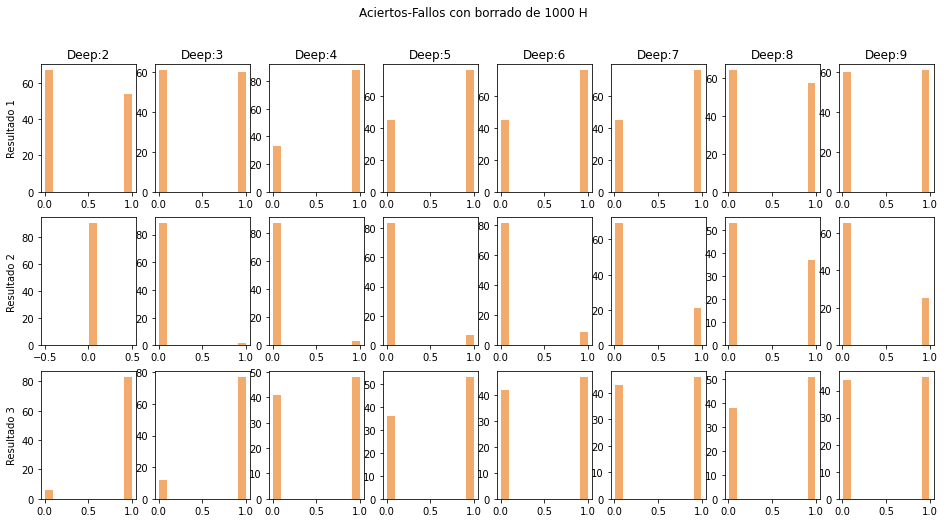

In [262]:
pinta([2,3,4,5,6,7,8,9],'Aciertos-Fallos con borrado de 1000 H')

Borramos 1000 victorias del de casa y usamos un profundida de arbol de 6


## Matriz de confusion para los mejores: 5,6,7

In [267]:
print('Jornada: '+str(a))
X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"]>= a]
X_test_head=X_test_head[10:]
dt = DecisionTreeClassifier(max_depth=9, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
dt.fit(X_train,Y_train)
score_train=dt.score(X_train, Y_train)
score_test=dt.score(X_test, Y_test)
print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
# Predecimos resultado final:
y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-ResultadoFT'])
X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
X_test_head = pd.concat([X_test_head, Y_test], axis=1)
X_test_head['Success']=(X_test_head['Pred-ResultadoFT']==X_test_head['ResultadoFT']).astype(int)

Jornada: 2020-09-12
Resultados para: depth: 10 - Train: 0.5857749469214437 - Test 0.43666666666666665


In [268]:
# Para deep 6
confusion_matrix(Y_test, dt.predict(X_test), labels=[1.0, 2.0, 3.0])


array([[61, 33, 27],
       [44, 25, 21],
       [19, 25, 45]], dtype=int64)

In [269]:
print(classification_report(Y_test, dt.predict(X_test), target_names=["1", "2", "3"]))

              precision    recall  f1-score   support

           1       0.49      0.50      0.50       121
           2       0.30      0.28      0.29        90
           3       0.48      0.51      0.49        89

    accuracy                           0.44       300
   macro avg       0.43      0.43      0.43       300
weighted avg       0.43      0.44      0.43       300



## Accuracy por jornadas

In [270]:
# Vemos como se porta para las ultimas jornadas conocidas
lista_a=[]
lista_x=[]
lista_strain=[]
lista_stest=[]
resultados=[]
for a in jornadas:   
    dias_jornada=jornadas[a]
    X_test = liga[liga["Date1"].isin(dias_jornada)].drop(variables_borrar, axis = 1)
    X_train = liga[liga['Date1']< jornadas[a][0]].drop(variables_borrar, axis = 1)
    Y_test = liga[liga["Date1"].isin(dias_jornada)]['ResultadoFT']
    Y_train = liga[liga['Date1']< jornadas[a][0]]['ResultadoFT']
    X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"].isin(dias_jornada)]
    X_test_head['Jornada']=a
    
    # Solo las 4000 primeras filas
    #X_train=X_train[0:4000]
    #Y_train=Y_train[0:4000]
    
    print('Jornada: '+str(a))
    for x in [9]:
        dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
        dt.fit(X_train,Y_train)
        score_train=dt.score(X_train, Y_train)
        score_test=dt.score(X_test, Y_test)
        print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
        lista_a.append(a)
        lista_x.append(x)
        lista_strain.append(score_train)
        lista_stest.append(score_test)
        # Predecimos resultado final:
        y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-ResultadoFT-'+str(x)])
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)



Jornada: 30
Resultados para: depth: 9 - Train: 0.5822 - Test 0.5
Jornada: 29
Resultados para: depth: 9 - Train: 0.5817635270541082 - Test 0.5
Jornada: 28
Resultados para: depth: 9 - Train: 0.5827309236947791 - Test 0.2
Jornada: 27
Resultados para: depth: 9 - Train: 0.5844234252364661 - Test 0.4
Jornada: 26
Resultados para: depth: 9 - Train: 0.581887858007261 - Test 0.5
Jornada: 25
Resultados para: depth: 9 - Train: 0.5790218270008084 - Test 0.5
Jornada: 24
Resultados para: depth: 9 - Train: 0.5809195867935993 - Test 0.4
Jornada: 23
Resultados para: depth: 9 - Train: 0.5785627283800243 - Test 0.5
Jornada: 22
Resultados para: depth: 9 - Train: 0.5892166836215667 - Test 0.3
Jornada: 21
Resultados para: depth: 9 - Train: 0.5898063200815494 - Test 0.4
Jornada: 20
Resultados para: depth: 9 - Train: 0.5840653728294177 - Test 0.7
Jornada: 19
Resultados para: depth: 9 - Train: 0.590937306021105 - Test 0.4
Jornada: 18
Resultados para: depth: 9 - Train: 0.590937306021105 - Test 0.4


In [271]:
score_df=pd.DataFrame(index=lista_x, data={'Jornada':lista_a, 
                            'Score_test':lista_stest})
fig = go.Figure()
fig.add_trace(go.Scatter(x=score_df['Jornada'],y=score_df['Score_test'], mode='lines+markers', name='Score_test'))
fig.show()

In [109]:
top_features = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(60)

In [110]:
top_features

F2F-H-VCA-1                      0.221740
ATM-WHH-2                        0.138525
HomeTeamCode                     0.062698
F2F-H-IWA-1                      0.046719
AwayTeamCode                     0.030613
F2F-H-WHA-3                      0.020240
ATM-AY-3                         0.020032
HTM-HS-3                         0.017298
F2F-H-B365A-1                    0.016712
HTM-AwayTeamCode-7               0.016379
HTM-AF-3                         0.016000
HTM-IWH-3                        0.015124
HTM-HS-1                         0.014750
F2F-H-BWH-6                      0.014685
ATM-deltaPuntosAwayTeam-3        0.014639
HTM-BWD-9                        0.014436
ATM-IWH-9                        0.014403
ATM-DayWeek_Code-2               0.014294
HTM-WHA-5                        0.014161
HTM-Month-5                      0.013584
HTM-IWD-10                       0.013498
ATM-HF-8                         0.013200
ATM-AF-7                         0.012878
F2F-H-deltaFTAG-6                0

## Ensemble

In [230]:
lista_x=[]
lista_strain=[]
lista_stest=[]
for i in range(1,40,1):
    xg_reg = xgb.XGBClassifier( n_estimators = i, 
                                max_depth=6,random_state=RANDOM_STATE)
    xg_reg.fit(X_train,Y_train)
    score_train=xg_reg.score(X_train, Y_train)
    score_test=xg_reg.score(X_test, Y_test)
    print('n_stimators: {}. Train: {} - Test: {}'.format(i,score_train,score_test))
    lista_x.append(i)
    lista_strain.append(score_train)
    lista_stest.append(score_test)
score_df=pd.DataFrame(index=lista_x, data={'Score_train':lista_strain, 'Score_test':lista_stest})

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_stimators: 1. Train: 0.5990740740740741 - Test: 0.38571428571428573
[19:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_stimators: 2. Train: 0.6583333333333333 - Test: 0.4035714285714286
[19:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'

n_stimators: 22. Train: 0.968287037037037 - Test: 0.42142857142857143
[19:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_stimators: 23. Train: 0.9724537037037037 - Test: 0.425
[19:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_stimators: 24. Train: 0.975925925925926 - Test: 0.4142857142857143
[19:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

KeyboardInterrupt: 

In [22]:
score_df.sort_values(by='Score_test',ascending=False)

,Score_train,Score_test
24,0.938346,0.507143
16,0.876692,0.507143
26,0.946805,0.503571
23,0.934586,0.503571
25,0.941729,0.503571
20,0.913722,0.503571
18,0.899248,0.500000
17,0.889474,0.500000
22,0.924436,0.496429
37,0.984774,0.492857


# Tunning hiperpàrametros para Goles

In [154]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')

In [155]:
liga.shape

(5630, 1139)

In [156]:
jornadas={#31:['2021-04-21','2021-04-22'],
          30:['2021-04-09','2021-04-10','2021-04-11','2021-04-12'],
          29:['2021-04-02','2021-04-03','2021-04-04','2021-04-05','2021-04-07'],
          28:['2021-03-19','2021-03-20','2021-03-21'],
          27:['2021-03-12','2021-03-13','2021-03-14','2021-03-15'],
          26:['2021-03-05','2021-03-06','2021-03-07','2021-03-08'],
          25:['2021-02-26','2021-02-27','2021-02-28','2021-03-01'],
          24:['2021-02-19','2021-02-20','2021-02-21','2021-02-22'],
          23:['2021-02-12','2021-02-13','2021-02-14','2021-02-15'],
          22:['2021-02-05','2021-02-06','2021-02-07','2021-02-08'],
          21:['2021-01-29','2021-01-30','2021-01-31','2021-02-01'],
          20:['2021-01-22','2021-01-23','2021-01-24','2021-01-25'],
          19:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21'],
          18:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21']}

## Resanpling del dataset

In [158]:
liga.groupby(['resultadoGolesFT_Code']).agg({'resultadoGolesFT_Code':len}).head()

,resultadoGolesFT_Code
resultadoGolesFT_Code,
0,652
1,610
2,495
3,440
4,424


In [159]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['resultadoGolesFT_Code']==0) & (liga['Temporada']!='2020-2021')].sample(200, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['resultadoGolesFT_Code']==1) & (liga['Temporada']!='2020-2021')].sample(200, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [160]:
liga.groupby(['resultadoGolesFT_Code']).agg({'resultadoGolesFT_Code':len}).head()

,resultadoGolesFT_Code
resultadoGolesFT_Code,
0,452
1,410
2,495
3,440
4,424


## Entrenamos con todo excepto esta ultima temporada

In [161]:
a='2020-09-12'

X_test = liga[liga["Date1"] >= a ].drop(variables_borrar, axis = 1)
X_train = liga[liga['Date1']< a].drop(variables_borrar, axis = 1)

Y_test = liga[liga["Date1"]>= a ]['resultadoGolesFT_Code']
Y_train = liga[liga['Date1']< a]['resultadoGolesFT_Code']

X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"]>= a]

#Quitamos la ultima jornada ya que no tenemso resultados y no nos sirve para test
Y_test=Y_test[10:]
X_test=X_test[10:]
X_test_head=X_test_head[10:]

In [162]:
lista_a=[]
lista_x=[]
lista_strain=[]
lista_stest=[]
resultados=[]
print('Jornada: '+str(a))
for x in list(range(1,14)):
    dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
    #dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE)
    dt.fit(X_train,Y_train)
    score_train=dt.score(X_train, Y_train)
    score_test=dt.score(X_test, Y_test)
    print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
    lista_a.append(a)
    lista_x.append(x)
    lista_strain.append(score_train)
    lista_stest.append(score_test)

    # Predecimos resultado final:
    y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-resultadoGolesFT_Code-'+str(x)])
    X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
    # Añadimos el resultado real para calcular aciertos
    #X_test_head['Success']=(results_df['Pred-ResultadoFT-'+str(x)]==results_df['ResultadoFT']).astype(int)
    #resultados.append(results_df)
X_test_head = pd.concat([ X_test_head, Y_test], axis=1)
for x in list(range(1,14)):
    X_test_head['Success-'+str(x)]=(X_test_head['Pred-resultadoGolesFT_Code-'+str(x)]==X_test_head['resultadoGolesFT_Code']).astype(int)

Jornada: 2020-09-12
Resultados para: depth: 1 - Train: 0.0975609756097561 - Test 0.10666666666666667
Resultados para: depth: 2 - Train: 0.11402439024390244 - Test 0.11333333333333333
Resultados para: depth: 3 - Train: 0.12317073170731707 - Test 0.15
Resultados para: depth: 4 - Train: 0.1315040650406504 - Test 0.15333333333333332
Resultados para: depth: 5 - Train: 0.14227642276422764 - Test 0.15666666666666668
Resultados para: depth: 6 - Train: 0.1563008130081301 - Test 0.14666666666666667
Resultados para: depth: 7 - Train: 0.16707317073170733 - Test 0.15666666666666668
Resultados para: depth: 8 - Train: 0.18556910569105692 - Test 0.14
Resultados para: depth: 9 - Train: 0.20548780487804877 - Test 0.10666666666666667
Resultados para: depth: 10 - Train: 0.2233739837398374 - Test 0.11666666666666667
Resultados para: depth: 11 - Train: 0.24308943089430896 - Test 0.09
Resultados para: depth: 12 - Train: 0.2605691056910569 - Test 0.09666666666666666
Resultados para: depth: 13 - Train: 0.27581

In [165]:
score_df=pd.DataFrame(index=lista_x, data={'Score_train':lista_strain, 
                            'Score_test':lista_stest})
fig = go.Figure()
fig.add_trace(go.Scatter(x=score_df.index,y=score_df['Score_train'], mode='lines+markers', name='Score_train'))
fig.add_trace(go.Scatter(x=score_df.index,y=score_df['Score_test'], mode='lines+markers', name='Score_test'))
fig.show()

In [163]:
def pinta (x,target,texto):
    # Definimos tantas columnas como variables nos pasen
    fig,ax=plt.subplots(11,len(x))
    fig.suptitle(texto)
    fig.set_size_inches(16,16)
    j=0
    for b in x:
        _X=X_test_head[['Pred-'+target+'-'+str(b),target,'Success-'+str(b)]]
        ax[0,j].set_title('Deep:'+str(b))
        for a in list(range(0,11)):
            #ax[a-1,0].set_ylabel('Resultado '+str(a))
            #ax[a-1,j].hist(x=_X[_X[target]==a]['Success-'+str(b)], color='#F2AB6D', rwidth=0.85,)
            ax[a,0].set_ylabel('Resultado '+str(a))
            ax[a,j].hist(x=_X[_X[target]==a]['Success-'+str(b)], color='#F2AB6D', rwidth=0.85,)
        j+=1
    #fig.savefig('./figura.jpg')

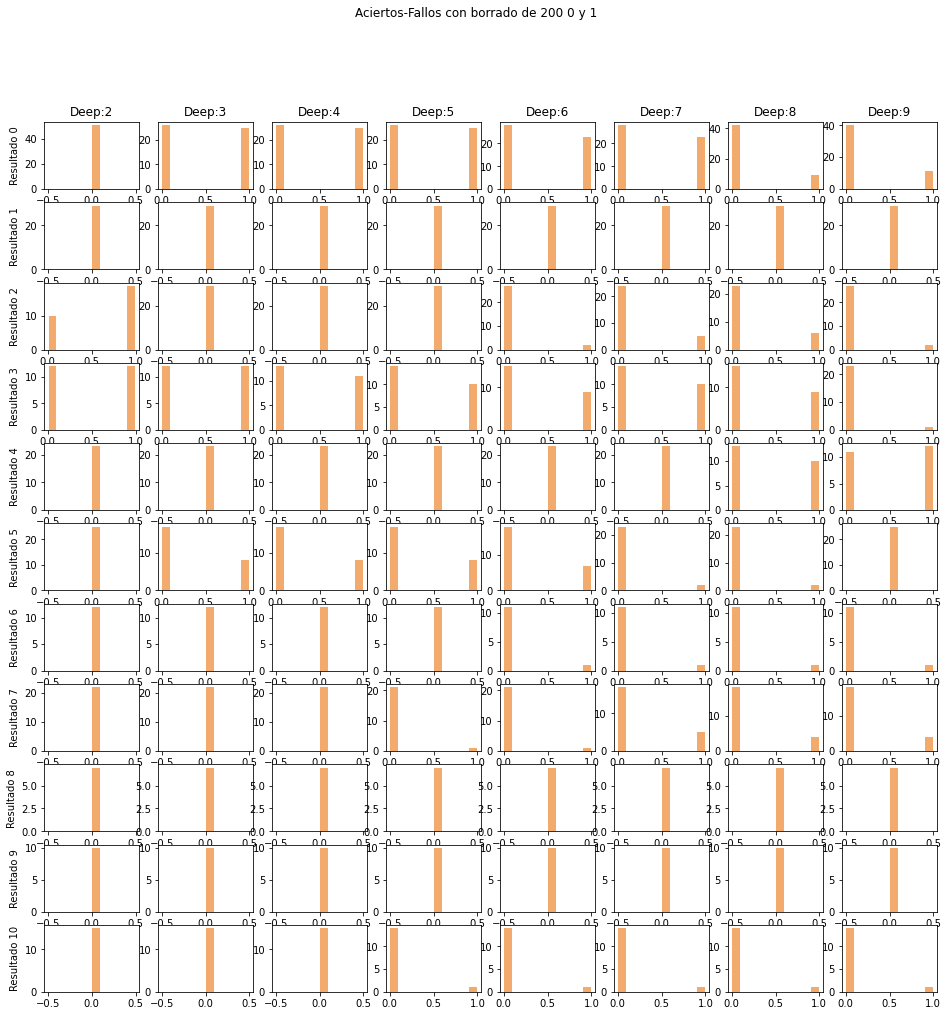

In [164]:
pinta([2,3,4,5,6,7,8,9],'resultadoGolesFT_Code','Aciertos-Fallos con borrado de 200 0 y 1')

## Matriz de confusion para los mejores

In [167]:
print('Jornada: '+str(a))
X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"]>= a]
X_test_head=X_test_head[10:]
dt = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
dt.fit(X_train,Y_train)
score_train=dt.score(X_train, Y_train)
score_test=dt.score(X_test, Y_test)
print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
# Predecimos resultado final:
y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-resultadoGolesFT_Code'])
X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
X_test_head = pd.concat([X_test_head, Y_test], axis=1)
X_test_head['Success']=(X_test_head['Pred-resultadoGolesFT_Code']==X_test_head['resultadoGolesFT_Code']).astype(int)

Jornada: 2020-09-12
Resultados para: depth: 13 - Train: 0.14227642276422764 - Test 0.15666666666666668


In [168]:
# Para deep 5
confusion_matrix(Y_test, dt.predict(X_test))


array([[25,  0,  1,  7,  0, 17,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [11,  0,  0, 11,  1,  5,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [13,  0,  0,  7,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 8,  0,  0, 10,  0,  4,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1],
       [12,  0,  0,  1,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [12,  0,  0,  4,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1],
       [ 5,  0,  0,  2,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 8,  0,  0,  2,  1,  9,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 7,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 7,  0,  0,  4,  1,  2

In [169]:
# Para deep 5
print(classification_report(Y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.20      0.49      0.28        51
           1       0.00      0.00      0.00        29
           2       0.00      0.00      0.00        29
           3       0.16      0.42      0.24        24
           4       0.00      0.00      0.00        23
           5       0.08      0.32      0.13        25
           6       0.00      0.00      0.00        12
           7       1.00      0.05      0.09        22
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        10
          10       0.25      0.07      0.11        15
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
          17       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Accuracy por jornadas 

In [170]:
lista_a=[]
lista_x=[]
lista_strain=[]
lista_stest=[]
resultados=[]
for a in jornadas:   
    dias_jornada=jornadas[a]
    X_test = liga[liga["Date1"].isin(dias_jornada)].drop(variables_borrar, axis = 1)
    X_train = liga[liga['Date1']< jornadas[a][0]].drop(variables_borrar, axis = 1)
    Y_test = liga[liga["Date1"].isin(dias_jornada)]['resultadoGolesFT_Code']
    Y_train = liga[liga['Date1']< jornadas[a][0]]['resultadoGolesFT_Code']
    X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"].isin(dias_jornada)]
    X_test_head['Jornada']=a
    
    # Solo las 4000 primeras filas
    #X_train=X_train[0:4000]
    #Y_train=Y_train[0:4000]
    
    print('Jornada: '+str(a))
    for x in [5]:
        dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
        dt.fit(X_train,Y_train)
        score_train=dt.score(X_train, Y_train)
        score_test=dt.score(X_test, Y_test)
        print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,score_test))
        lista_a.append(a)
        lista_x.append(x)
        lista_strain.append(score_train)
        lista_stest.append(score_test)
        # Predecimos resultado final:
        y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-resultadoGolesFT_Code-'+str(x)])
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)


Jornada: 30
Resultados para: depth: 5 - Train: 0.14414587332053744 - Test 0.2
Jornada: 29
Resultados para: depth: 5 - Train: 0.14403846153846153 - Test 0.2
Jornada: 28
Resultados para: depth: 5 - Train: 0.14373795761078997 - Test 0.2
Jornada: 27
Resultados para: depth: 5 - Train: 0.14365707665572505 - Test 0.1
Jornada: 26
Resultados para: depth: 5 - Train: 0.14241486068111456 - Test 0.1
Jornada: 25
Resultados para: depth: 5 - Train: 0.1423032183016673 - Test 0.2
Jornada: 24
Resultados para: depth: 5 - Train: 0.14260734408393239 - Test 0.2
Jornada: 23
Resultados para: depth: 5 - Train: 0.139797507788162 - Test 0.4
Jornada: 22
Resultados para: depth: 5 - Train: 0.14009756097560977 - Test 0.1
Jornada: 21
Resultados para: depth: 5 - Train: 0.14037145650048877 - Test 0.0
Jornada: 20
Resultados para: depth: 5 - Train: 0.14123408423114595 - Test 0.2
Jornada: 19
Resultados para: depth: 5 - Train: 0.1423755700971644 - Test 0.0
Jornada: 18
Resultados para: depth: 5 - Train: 0.1423755700971644 - 

In [171]:
score_df=pd.DataFrame(index=lista_x, data={'Jornada':lista_a, 
                            'Score_test':lista_stest})
fig = go.Figure()
fig.add_trace(go.Scatter(x=score_df['Jornada'],y=score_df['Score_test'], mode='lines+markers', name='Score_test'))
fig.show()

In [172]:
top_features = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(60)

In [173]:
top_features

HomeTeamCode             0.163647
ATM-WHH-2                0.114278
HTM-VCD-10               0.060427
F2F-H-B365D-3            0.046569
F2F-H-HF-6               0.037043
HTM-AF-5                 0.035711
F2F-H-BWH-1              0.032782
ATM-B365A-5              0.032235
F2F-H-WHH-1              0.031363
F2F-H-HC-4               0.031358
HTM-B365A-8              0.029753
HTM-BWH-4                0.028679
HTM-VCD-5                0.028578
HTM-HST-7                0.028548
HTM-HS-5                 0.028470
ATM-B365H-1              0.027521
F2F-H-IWA-1              0.026643
HTM-AwayTeamCode-5       0.026481
ATM-IWH-3                0.026069
HTM-deltaFTAG-8          0.025976
HTM-AC-7                 0.025853
F2F-H-HC-2               0.025422
ATM-Day-3                0.023002
ATM-HS-9                 0.022799
ATM-BWH-10               0.021995
ATM-WHA-3                0.018798
HTM-Month-10             0.000000
HTM-Month-8              0.000000
HTM-Month-9              0.000000
HTM-Month-7   

# Prediccion jornada 31

## Prediccion Resultado

In [111]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')

In [113]:
liga.shape

(6010, 1207)

In [114]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['FTR']=='H') & (liga['Temporada']!='2020-2021')].sample(1000, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['resultadoGolesFT_Code']==1) & (liga['Temporada']!='2020-2021')].sample(200, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [115]:
jornadas={31:['2021-04-21','2021-04-22'],
          30:['2021-04-09','2021-04-10','2021-04-11','2021-04-12'],
          29:['2021-04-02','2021-04-03','2021-04-04','2021-04-05','2021-04-07'],
          28:['2021-03-19','2021-03-20','2021-03-21'],
          27:['2021-03-12','2021-03-13','2021-03-14','2021-03-15'],
          26:['2021-03-05','2021-03-06','2021-03-07','2021-03-08'],
          25:['2021-02-26','2021-02-27','2021-02-28','2021-03-01'],
          24:['2021-02-19','2021-02-20','2021-02-21','2021-02-22'],
          23:['2021-02-12','2021-02-13','2021-02-14','2021-02-15'],
          22:['2021-02-05','2021-02-06','2021-02-07','2021-02-08'],
          21:['2021-01-29','2021-01-30','2021-01-31','2021-02-01'],
          20:['2021-01-22','2021-01-23','2021-01-24','2021-01-25'],
          19:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21'],
          18:['2020-12-15','2020-12-16','2021-01-19','2021-01-20','2021-01-21']}

In [116]:
# OPredecimos la jornada 30:
a=31
dias_jornada=jornadas[a]
X_test = liga[liga["Date1"].isin(dias_jornada)].drop(variables_borrar, axis = 1)
X_train = liga[liga['Date1']< jornadas[a][0]].drop(variables_borrar, axis = 1)
Y_test = liga[liga["Date1"].isin(dias_jornada)]['ResultadoFT']
Y_train = liga[liga['Date1']< jornadas[a][0]]['ResultadoFT']
# Sacamos el -head con los partidos para ver despues mejor el resultado
X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"].isin(dias_jornada)]
X_test_head['Jornada']=a
# Probamos para diversas profuncidades del arbnol:
#for x in [4,5,6,7]:
for x in [4,5,6]:
        dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
        #dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE)
        dt.fit(X_train,Y_train)
        score_train=dt.score(X_train, Y_train)
        print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,0))        
        # Predecimos resultado final:
        y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-ResultadoFT-'+str(x)])
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
X_test_head

Resultados para: depth: 4 - Train: 0.48291666666666666 - Test 0
Resultados para: depth: 5 - Train: 0.5016666666666667 - Test 0
Resultados para: depth: 6 - Train: 0.5247916666666667 - Test 0


,HomeTeam,AwayTeam,Date,Jornada,Pred-ResultadoFT-4,Pred-ResultadoFT-5,Pred-ResultadoFT-6
0,Ath Madrid,Huesca,22/04/2021,31,1.0,1.0,1.0
1,Granada,Eibar,22/04/2021,31,2.0,2.0,2.0
2,Sociedad,Celta,22/04/2021,31,3.0,3.0,3.0
3,Barcelona,Getafe,22/04/2021,31,2.0,1.0,2.0
4,Levante,Sevilla,21/04/2021,31,3.0,3.0,3.0
5,Osasuna,Valencia,21/04/2021,31,2.0,2.0,2.0
6,Betis,Ath Bilbao,21/04/2021,31,3.0,3.0,3.0
7,Alaves,Villarreal,21/04/2021,31,3.0,3.0,3.0
8,Elche,Valladolid,21/04/2021,31,2.0,2.0,2.0
9,Cadiz,Real Madrid,21/04/2021,31,3.0,3.0,3.0


In [179]:
X_test_head.to_csv(path_last+'/SP1-J'+str(jornada)+'/SP1_prediccion_jornada_'+str(jornada)+'_567.csv')

In [180]:
# OPredecimos la jornada jornada:
a=jornada
dias_jornada=jornadas[a]
X_test = liga[liga["Date1"].isin(dias_jornada)].drop(variables_borrar, axis = 1)
X_train = liga[liga['Date1']< jornadas[a][0]].drop(variables_borrar, axis = 1)
Y_test = liga[liga["Date1"].isin(dias_jornada)]['ResultadoFT']
Y_train = liga[liga['Date1']< jornadas[a][0]]['ResultadoFT']
# Sacamos el -head con los partidos para ver despues mejor el resultado
X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"].isin(dias_jornada)]
X_test_head['Jornada']=a
# Probamos para diversas profuncidades del arbnol:
for x in [6]:
        dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
        #dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE)
        dt.fit(X_train,Y_train)
        score_train=dt.score(X_train, Y_train)
        print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,0))        
        # Predecimos resultado final:
        y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-ResultadoFT'])
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
        #y_test_pred=pd.DataFrame(dt.predict_proba(X_test), index=Y_test.index, columns=['%1','%2','%3'])
        y_test_pred=pd.DataFrame(dt.predict_proba(X_test), index=Y_test.index)
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
X_test_head

Resultados para: depth: 6 - Train: 0.5201298701298701 - Test 0


,HomeTeam,AwayTeam,Date,Jornada,Pred-ResultadoFT,0,1,2
0,Ath Madrid,Huesca,22/04/2021,31,1.0,0.544444,0.213889,0.241667
1,Granada,Eibar,22/04/2021,31,1.0,0.375915,0.358015,0.266070
2,Sociedad,Celta,22/04/2021,31,2.0,0.267857,0.428571,0.303571
3,Barcelona,Getafe,22/04/2021,31,1.0,0.880734,0.068807,0.050459
4,Levante,Sevilla,21/04/2021,31,3.0,0.046980,0.073826,0.879195
5,Osasuna,Valencia,21/04/2021,31,1.0,0.375915,0.358015,0.266070
6,Betis,Ath Bilbao,21/04/2021,31,2.0,0.294915,0.359322,0.345763
7,Alaves,Villarreal,21/04/2021,31,3.0,0.204000,0.240000,0.556000
8,Elche,Valladolid,21/04/2021,31,1.0,0.375915,0.358015,0.266070
9,Cadiz,Real Madrid,21/04/2021,31,3.0,0.133333,0.169697,0.696970


In [181]:
X_test_head.to_csv(path_last+'/SP1-J'+str(jornada)+'/SP1_prediccion_jornada_'+str(jornada)+'_6Proba.csv')

## Prediccion Goles

In [184]:
liga=pd.read_csv(path_last+'\SP1-J'+str(jornada)+'\SP1_Modelo5_J'+str(jornada)+'-con-FE-condeltas.csv')
liga.drop('Unnamed: 0',axis=1,inplace=True)
liga['Date1']=pd.to_datetime(liga['Date1'], format='%Y-%m-%d')

In [185]:
liga.shape

(5630, 1139)

In [203]:
mapeo_resultadoGolesFT=pd.read_csv(path_last+'/SP1-encoders/SP1_mapeo_resultadoGolesFT.csv')

In [204]:
mapeo_resultadoGolesFT.shape

(55, 2)

In [205]:
mapeo_resultadoGolesFT

,resultadoGolesFT,index
0,1.0-1.0,0
1,1.0-0.0,1
2,2.0-1.0,2
3,2.0-0.0,3
4,0.0-0.0,4
5,0.0-1.0,5
6,1.0-2.0,6
7,0.0-2.0,7
8,3.0-0.0,8
9,3.0-1.0,9


In [206]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['resultadoGolesFT_Code']==0) & (liga['Temporada']!='2020-2021')].sample(200, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [207]:
# Borramos mil victorias del equipo de casa
liga.reset_index(drop=True,inplace=True)
liga.drop( liga[ (liga['resultadoGolesFT_Code']==1) & (liga['Temporada']!='2020-2021')].sample(200, random_state=RANDOM_STATE).index ,
            axis=0,inplace=True )

In [212]:
# OPredecimos la jornada 30:
a=jornada
dias_jornada=jornadas[a]
X_test = liga[liga["Date1"].isin(dias_jornada)].drop(variables_borrar, axis = 1)
X_train = liga[liga['Date1']< jornadas[a][0]].drop(variables_borrar, axis = 1)
Y_test = liga[liga["Date1"].isin(dias_jornada)]['resultadoGolesFT_Code']
Y_train = liga[liga['Date1']< jornadas[a][0]]['resultadoGolesFT_Code']
# Sacamos el -head con los partidos para ver despues mejor el resultado
X_test_head = liga[['HomeTeam','AwayTeam','Date']][liga["Date1"].isin(dias_jornada)]
X_test_head['Jornada']=a
# Probamos para diversas profuncidades del arbnol:
for x in [5]:
        dt = DecisionTreeClassifier(max_depth=6, random_state=RANDOM_STATE,min_samples_leaf=5 ,min_samples_split=20)
        #dt = DecisionTreeClassifier(max_depth=x, random_state=RANDOM_STATE)
        dt.fit(X_train,Y_train)
        score_train=dt.score(X_train, Y_train)
        print('Resultados para: depth: {} - Train: {} - Test {}'.format(x,score_train,0))        
        # Predecimos resultado final:
        y_test_pred=pd.DataFrame(dt.predict(X_test), index=Y_test.index, columns=['Pred-resultadoGolesFT_Code'])
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
        #y_test_pred=pd.DataFrame(dt.predict_proba(X_test), index=Y_test.index, columns=['%1','%2','%3'])
        y_test_pred=pd.DataFrame(dt.predict_proba(X_test), index=Y_test.index)
        X_test_head = pd.concat([X_test_head, y_test_pred], axis=1)
X_test_head

Resultados para: depth: 5 - Train: 0.1557471264367816 - Test 0


,HomeTeam,AwayTeam,Date,Jornada,Pred-resultadoGolesFT_Code,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,Ath Madrid,Huesca,22/04/2021,31,8,0.000000,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Granada,Eibar,22/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.026667,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490
2,Sociedad,Celta,22/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.016854,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348
3,Barcelona,Getafe,22/04/2021,31,3,0.076142,0.116751,0.114213,0.131980,0.060914,...,0.058376,0.005076,0.045685,0.015228,0.043147,0.007614,0.017766,0.002538,0.007614,0.058376
4,Levante,Sevilla,21/04/2021,31,0,0.114458,0.030120,0.054217,0.048193,0.042169,...,0.006024,0.042169,0.000000,0.054217,0.000000,0.054217,0.000000,0.078313,0.000000,0.084337
5,Osasuna,Valencia,21/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.026667,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490
6,Betis,Ath Bilbao,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.016854,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348
7,Alaves,Villarreal,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.016854,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348
8,Elche,Valladolid,21/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.026667,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490
9,Cadiz,Real Madrid,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.016854,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348


In [213]:
X_test_head['resultado']=X_test_head['Pred-resultadoGolesFT_Code'].map(mapeo_resultadoGolesFT.reset_index().set_index('index')['resultadoGolesFT'].head(21))

In [214]:
X_test_head

,HomeTeam,AwayTeam,Date,Jornada,Pred-resultadoGolesFT_Code,0,1,2,3,4,...,12,13,14,15,16,17,18,19,20,resultado
0,Ath Madrid,Huesca,22/04/2021,31,8,0.000000,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0-0.0
1,Granada,Eibar,22/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490,1.0-1.0
2,Sociedad,Celta,22/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348,0.0-1.0
3,Barcelona,Getafe,22/04/2021,31,3,0.076142,0.116751,0.114213,0.131980,0.060914,...,0.005076,0.045685,0.015228,0.043147,0.007614,0.017766,0.002538,0.007614,0.058376,2.0-0.0
4,Levante,Sevilla,21/04/2021,31,0,0.114458,0.030120,0.054217,0.048193,0.042169,...,0.042169,0.000000,0.054217,0.000000,0.054217,0.000000,0.078313,0.000000,0.084337,1.0-1.0
5,Osasuna,Valencia,21/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490,1.0-1.0
6,Betis,Ath Bilbao,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348,0.0-1.0
7,Alaves,Villarreal,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348,0.0-1.0
8,Elche,Valladolid,21/04/2021,31,0,0.104314,0.092157,0.093725,0.085098,0.097647,...,0.022745,0.015294,0.019608,0.014510,0.015294,0.009020,0.003922,0.003529,0.045490,1.0-1.0
9,Cadiz,Real Madrid,21/04/2021,31,5,0.087079,0.054775,0.094101,0.066011,0.108146,...,0.040730,0.011236,0.025281,0.007022,0.025281,0.008427,0.016854,0.002809,0.046348,0.0-1.0


In [215]:
X_test_head.to_csv(path_last+'/SP1-J'+str(jornada)+'/SP1_prediccion_jornada_'+str(jornada)+'_goles.csv')